<a href="https://colab.research.google.com/github/Fanny4370/EjerciciosPython_Diplo/blob/main/Copia_de_Copia_de_TP4_G17_notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Consigna**


El sector de equipamiento médico comprende productos vinculados al tratamiento médico y cuidado hospitalario. Se pueden establecer cuatro segmentos: Equipo, Implantes, Insumos y Mobiliarios. Se trata de sector que incorpora un nivel importante de tecnología y valor agregado, por lo que es de interés para las agencias de promoción de exportaciones identificar potenciales destinos de exportación a los efectos de implementar estrategias de inserción comercial más focalizadas y diferenciadas, apoyando a las empresas del sector. 
 
Dado que el sector de la salud es de suma relevancia a nivel global, distintos organismos internacionales revelan diversos indicadores que pueden considerarse como proxies de demanda de equipamientos e insumos médicos en general.

**Objetivo**

Realizar una **segmentación de mercados** que permita agrupar a los distintos países como **destinos potenciales** de las exportaciones argentinas de equipamientos médicos y **realizar una caracterización de los mismos**. Como punto adicional (optativo) se pretende establecer un ranking de esos potenciales destinos generando un indicador sintético que contemple las variables seleccionadas.


# **Setup environment**

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 1.5 MB/s 


In [ ]:
# Tratamiento de datos

# ==============================================================================
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import statsmodels.api as sm
from string import ascii_letters

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
%matplotlib inline
style.use('ggplot') or plt.style.use('ggplot')

import seaborn as sns

# Preprocesado y modelado
# ==============================================================================

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import sys
import sklearn.neighbors._base

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# **Importación de datos**

> La primer base de datos contiene 167 registros de países con información que detalla los valores de importaciones de productos médicos e información que detalla el porcentaje proveniente de distintos origenes



In [ ]:
# Leemos el dataset comex_equipo_medico
comex_equipo_medico = "https://drive.google.com/file/d/14hWOeJ-p6YHp3Ft1fDLOafizHZr3sl0j/view?usp=sharing"
path1 = 'https://drive.google.com/uc?export=download&id=' + comex_equipo_medico.split('/')[-2]


df_comex = pd.read_csv(path1, sep=",")
df_comex.head()

,iso_pais,pais,continente,value,media_value,last_value,ARG_value,UE_value,CHN_value,Resto_value,ARG_part,UE_part,CHN_part,Resto_part
0,ABW,Aruba,América,44565273,8913054.6,13822425,0,32694844,40408,11830021,0.00000,73.363949,0.090671,26.545380
1,AFG,Afganistán,Asia,792061147,264020382.3,534490822,0,74576272,241478377,476006498,0.00000,9.415469,30.487340,60.097191
2,AGO,Angola,África,237428801,118714400.5,70214828,93356,155144540,34415249,47775656,0.03932,65.343606,14.494977,20.122098
3,ALB,Albania,Europa,84610049,16922009.8,15440800,0,59196413,13693192,11720444,0.00000,69.963809,16.183884,13.852307
4,AND,Andorra,Europa,46198962,9239792.4,10398944,0,41541216,323740,4334006,0.00000,89.918072,0.700752,9.381176




> La segunda base de datos utilizada contiene información de 195 países y distinta información acerca de indicadores demográficos, económicos, institucionales, de salud, de gastos en salud y de comercio exterior.



In [ ]:
## Leemos el dataset general_salud_equip_medico  
general_salud_equip_medico = "https://drive.google.com/file/d/1DJ11n1qjzSORP2S2dWscSrEJZiqKBRNe/view?usp=sharing"
path2 = 'https://drive.google.com/uc?export=download&id=' + general_salud_equip_medico.split('/')[-2]

df_general = pd.read_csv(path2, sep=",")
df_general.head()

,pais,cod_ISO,D1,D2,D3,D4,D5,D6,D7,E1,...,S12,S13,G1,G2,G3,G4,G5,G6,G7,G8
0,Afganistán,AFG,2.490790,67.9,6.587,4.477,48.466509,51.533491,35530081.0,2.456957e+09,...,144.2,NaN,47.1,0.784,0.639,0.103,60.1,0.052,0.784,0.020
1,Albania,ALB,-0.091972,8.8,7.549,1.710,49.520421,50.479579,2873457.0,1.493673e+09,...,440.4,NaN,151.4,0.569,0.499,0.068,265.9,0.423,0.569,0.095
2,Alemania,DEU,0.408592,3.7,11.300,1.570,50.757794,49.242206,82685827.0,7.199424e+11,...,671.1,NaN,575.3,0.125,0.132,0.112,4591.8,0.845,0.155,0.214
3,Andorra,AND,-0.409736,3.3,NaN,NaN,NaN,NaN,76965.0,NaN,...,2165.0,NaN,1570.7,0.364,0.159,0.120,4315.7,0.556,0.444,0.140
4,Angola,AGO,3.313507,81.1,8.372,5.623,50.963036,49.036964,29784193.0,1.579772e+10,...,65.3,NaN,36.2,0.334,0.240,0.029,108.6,0.475,0.497,0.054


### Descripción de las variables

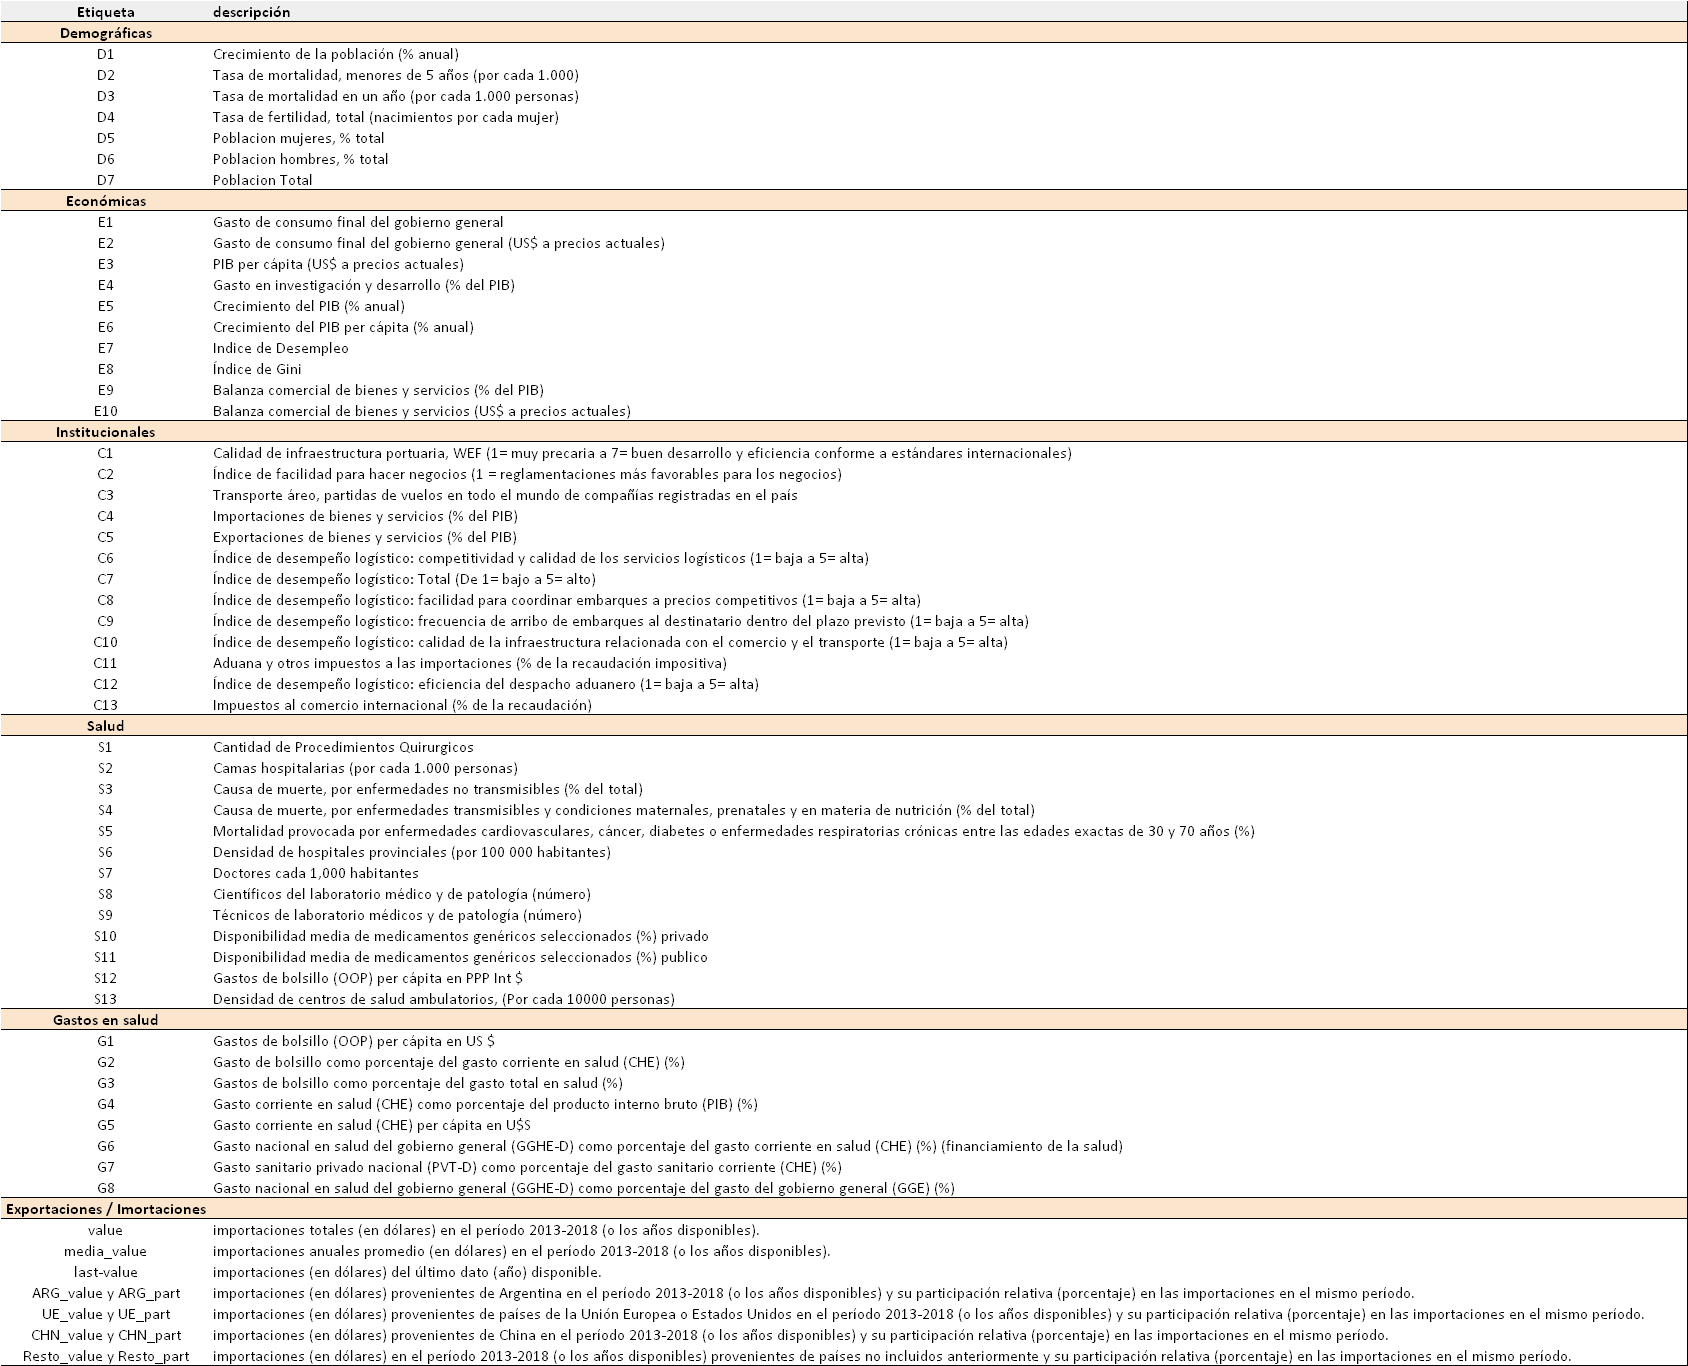

--------------------------------------------------------------------------------
# **Preparacion del Dataset**
--------------------------------------------------------------------------------

## Analisis de valores nulos y missings

In [ ]:
## Revisando el tamaño de las bases de datos a tratar.
print("-Consultanto dimensión de df_comex")
print(f"Cantidad de países en df_comex: {len(df_comex)}")
print(f"Cantidad de columnas en df_comex: {len(df_comex.columns)}")

print("\n-Consultanto dimensión de df_general")
print(f"Cantidad de países en df_general: {len(df_general)}")
print(f"Cantidad de columnas en df_general: {len(df_general.columns)}")

-Consultanto dimensión de df_comex
Cantidad de países en df_comex: 167
Cantidad de columnas en df_comex: 14

-Consultanto dimensión de df_general
Cantidad de países en df_general: 195
Cantidad de columnas en df_general: 53


In [ ]:
## Revisando la cantidad de valores nulos de df_comex
round(df_comex.isnull().sum()/len(df_comex)*100,2)

iso_pais       0.0
pais           0.0
continente     0.0
value          0.0
media_value    0.0
last_value     0.0
ARG_value      0.0
UE_value       0.0
CHN_value      0.0
Resto_value    0.0
ARG_part       0.0
UE_part        0.0
CHN_part       0.0
Resto_part     0.0
dtype: float64

In [ ]:
## Revisando el porcentaje de valores nulos por columna de df_general
round(df_general.isnull().sum()/len(df_general)*100,)

pais        0.0
cod_ISO     0.0
D1          1.0
D2          3.0
D3          4.0
D4          5.0
D5          6.0
D6          6.0
D7          1.0
E1         21.0
E2         21.0
E3          4.0
E4         88.0
E5          4.0
E6          4.0
E7          8.0
E8         88.0
E9         14.0
E10        15.0
C1         31.0
C2          6.0
C3         21.0
C4         14.0
C5         14.0
C6         19.0
C7         19.0
C8         19.0
C9         19.0
C10        19.0
C11        55.0
C12        19.0
C13        54.0
S1         94.0
S2         87.0
S3          7.0
S4          7.0
S5          7.0
S6         32.0
S7          7.0
S8         64.0
S9         46.0
S10        81.0
S11        82.0
S12         5.0
S13        93.0
G1          5.0
G2          5.0
G3          5.0
G4          7.0
G5          4.0
G6          9.0
G7          9.0
G8          8.0
dtype: float64

In [ ]:
## Revisando con cuantas variables nos quedariamos si decidieramos excluir aquellas que tienen más de un 10% de datos faltantes.
missings = df_general.isnull().sum()/len(df_general)*100
print("Total variables: ", len(df_general.columns) - 2)

print("Nos quedariamos con: ", len(missings[missings < 10].index) - 2 )
print("---------------------")
columnas_final = missings[missings < 10]
columnas_final.round()

Total variables:  51
Nos quedariamos con:  25
---------------------


pais       0.0
cod_ISO    0.0
D1         1.0
D2         3.0
D3         4.0
D4         5.0
D5         6.0
D6         6.0
D7         1.0
E3         4.0
E5         4.0
E6         4.0
E7         8.0
C2         6.0
S3         7.0
S4         7.0
S5         7.0
S7         7.0
S12        5.0
G1         5.0
G2         5.0
G3         5.0
G4         7.0
G5         4.0
G6         9.0
G7         9.0
G8         8.0
dtype: float64

In [ ]:
df_general[columnas_final.index].dtypes

pais        object
cod_ISO     object
D1         float64
D2         float64
D3         float64
D4         float64
D5         float64
D6         float64
D7         float64
E3         float64
E5         float64
E6         float64
E7         float64
C2         float64
S3         float64
S4         float64
S5         float64
S7         float64
S12        float64
G1         float64
G2         float64
G3         float64
G4         float64
G5          object
G6         float64
G7         float64
G8         float64
dtype: object

In [ ]:
df_general.G5.replace("No data", np.NaN, inplace=True)
df_general["G5"] = df_general.G5.astype("float")

Luego de descartar las columnas con un porcentaje de missing mayor al 10%, empleamos la técnica Miss Forest (https://www.kaggle.com/lmorgan95/missforest-the-best-imputation-algorithm) para imputar los valores faltantes y de esta manera poder trabajar con la mayor cantidad de variables.

In [ ]:
imp = MissForest(max_iter=2, random_state=42)
X = df_general[columnas_final.index[2:]]
X = imp.fit_transform(X)
print(X)

Iteration: 0
Iteration: 1
[[ 2.49078956e+00  6.79000000e+01  6.58700000e+00 ...  5.20000000e-02
   7.84000000e-01  2.00000000e-02]
 [-9.19722900e-02  8.80000000e+00  7.54900000e+00 ...  4.23000000e-01
   5.69000000e-01  9.50000000e-02]
 [ 4.08591509e-01  3.70000000e+00  1.13000000e+01 ...  8.45000000e-01
   1.55000000e-01  2.14000000e-01]
 ...
 [ 2.38647084e+00  5.54000000e+01  6.37400000e+00 ...  1.02000000e-01
   8.20000000e-01  4.61600000e-02]
 [ 2.98512436e+00  6.00000000e+01  7.60400000e+00 ...  3.66000000e-01
   3.92000000e-01  7.10000000e-02]
 [ 2.32286399e+00  5.03000000e+01  7.85200000e+00 ...  2.08000000e-01
   4.20000000e-01  1.45000000e-01]]


In [ ]:
df_general_missings = pd.DataFrame(X, columns=columnas_final.index[2:])

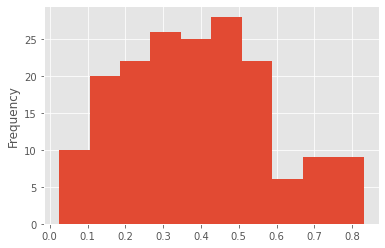

In [ ]:
# Observamos la frecuencia absoluta de una de las variables antes de aplicar el método
df_general.G7.plot.hist()

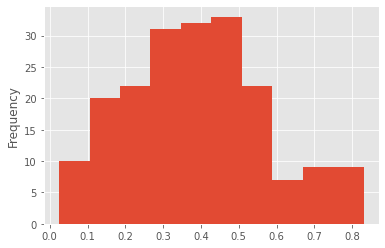

In [ ]:
# Observamos la frecuencia absoluta de la misma variable luego de aplicar el método
# Vemos como se incrementan las frecuencias de los valores entre (0.3 - 0.5)
df_general_missings.G7.plot.hist()

In [ ]:
df_general_missings["pais"] = df_general["pais"]
df_general_missings["cod_ISO"] = df_general["cod_ISO"]
df_general_missings.head(5)

,D1,D2,D3,D4,D5,D6,D7,E3,E5,E6,E7,C2,S3,S4,S5,S7,S12,G1,G2,G3,G4,G5,G6,G7,G8,pais,cod_ISO
0,2.490790,67.9,6.58700,4.477000,48.466509,51.533491,35530081.0,550.068459,2.665292,0.139700,1.54200,167.00,44.100,36.400,29.800,2.84000,144.2,47.1,0.784,0.639,0.103,60.1,0.052,0.784,0.020,Afganistán,AFG
1,-0.091972,8.8,7.54900,1.710000,49.520421,50.479579,2873457.0,4537.579056,3.835544,3.931088,13.89800,63.00,93.100,2.900,17.000,26.30917,440.4,151.4,0.569,0.499,0.068,265.9,0.423,0.569,0.095,Albania,ALB
2,0.408592,3.7,11.30000,1.570000,50.757794,49.242206,82685827.0,44665.506370,2.157109,1.740556,3.42500,24.00,91.200,4.800,12.100,42.08700,671.1,575.3,0.125,0.132,0.112,4591.8,0.845,0.155,0.214,Alemania,DEU
3,-0.409736,3.3,9.98767,1.465411,49.901107,50.102583,76965.0,39146.548840,1.873197,2.291464,10.40581,57.39,74.416,15.607,10.013,33.33300,2165.0,1570.7,0.364,0.159,0.120,4315.7,0.556,0.444,0.140,Andorra,AND
4,3.313507,81.1,8.37200,5.623000,50.963036,49.036964,29784193.0,4100.289786,-0.147207,-3.401622,7.25300,173.00,27.400,63.400,16.500,2.14900,65.3,36.2,0.334,0.240,0.029,108.6,0.475,0.497,0.054,Angola,AGO


In [ ]:
df_general = df_general_missings.copy()

In [ ]:
df_general.isnull().sum()

D1         0
D2         0
D3         0
D4         0
D5         0
D6         0
D7         0
E3         0
E5         0
E6         0
E7         0
C2         0
S3         0
S4         0
S5         0
S7         0
S12        0
G1         0
G2         0
G3         0
G4         0
G5         0
G6         0
G7         0
G8         0
pais       0
cod_ISO    0
dtype: int64

## Merge de los dos datasets

Vamos a unir los dos datasets a través de su ISO, previamente controlamos que los códigos sean los mismos en ambos conjuntos, para no asociar información erronea a un país o dejar alguno sin unir.



### Verificacion de codigos de paises

In [ ]:
## Consultamos si todos los países de df_comex están presentes en df_general

#Con nombre pais:
#paises_com = set(df_comex["pais"])
#paises_gral = set(df_general["pais"])

#Con codigos ISO:
paises_comex = set(df_comex["iso_pais"])
paises_gral = set(df_general["cod_ISO"])

# Países que matchean el merge
coincidentes = paises_comex & paises_gral
print(f'Matchean {len(coincidentes)} códigos ISO')
print ("-------------------")

# Paises que no matchean en el merge
no_coinciden = (paises_comex - paises_gral)
print(f'No matchean {len(no_coinciden)} códigos ISO')
print("Los siguientes: ")
print(no_coinciden)

Matchean 157 códigos ISO
-------------------
No matchean 10 códigos ISO
Los siguientes: 
{'DNK', 'FRA', 'NLD', 'PYF', 'MKD', 'SWZ', 'PSE', 'ESP', 'KNA', 'GBR'}


In [ ]:
## Controlamos que los países asignados en df_comex coincidan con los encontrados en df_gral

for i in coincidentes:
  pais_comex = df_comex.pais[df_comex["iso_pais"] == i].values
  pais_gral = df_general.pais[df_general["cod_ISO"] == i].values
  if pais_comex == pais_gral :
    continue
  else :
    print(f'No coinciden {pais_comex} vs. {pais_gral}')

## Vemos que los que no coinciden, es solo por que el nombre del país está escrito de diferente manera. Es decir, los códigos ISO de ambos dataset son coincidentes.

No coinciden ['Egipto'] vs. ['Egipto, República Árabe de']
No coinciden ['Hong Kong (región administrativa especial de China)'] vs. ['Hong Kong, Región Administrativa Especial']
No coinciden ['San Vicente y Las Granadinas'] vs. ['San Vicente y las Granadinas']
No coinciden ['Moldova'] vs. ['República de Moldova']
No coinciden ['Yemen'] vs. ['Yemen, Rep. del']
No coinciden ['Congo'] vs. ['Congo, República del']
No coinciden ['Irán'] vs. ['Irán, República Islámica del']
No coinciden ['Timor Leste'] vs. ['Timor-Leste']
No coinciden ['Brunei'] vs. ['Brunei Darussalam']
No coinciden ['Rusia'] vs. ['Federación de Rusia']
No coinciden ['Macao (región administrativa especial de China)'] vs. ['Región Administrativa Especial de Macao, China']
No coinciden ['Corea'] vs. ['Corea, República de']
No coinciden ['Eslovaquia'] vs. ['República Eslovaca']
No coinciden ['Laos'] vs. ['República Democrática Popular Lao']


In [ ]:
for i in no_coinciden:
  pais_comex = df_comex.pais[df_comex["iso_pais"] == i].values
  if pais_comex[0] in df_general :
    print(f'El código ISO debería ser: {df_general.cod_ISO[df_general["pais"] == pais_comex[0].values]}')
  else :
    cod_iso_general = df_general.cod_ISO[df_general["pais"] == pais_comex[0]].values
    print(f'El código ISO para {pais_comex[0]} debe ser {cod_iso_general}')

El código ISO para Dinamarca debe ser ['GRL']
El código ISO para Francia debe ser ['ATF']
El código ISO para Países Bajos debe ser ['BES']
El código ISO para Francia debe ser ['ATF']
El código ISO para Macedonia debe ser []
El código ISO para Swazilandia debe ser []
El código ISO para Palestina debe ser []
El código ISO para España debe ser ['ES1']
El código ISO para San Cristóbal y Nevis debe ser []
El código ISO para Reino Unido de Gran Bretaña e Irlanda del Norte debe ser []


In [ ]:
## Adicionalmente, vamos a solicitar la diferencia simétrica de países (elementos que solo están en uno de los dos sets)
# Ver https://j2logo.com/python/tutorial/tipo-set-python/
print("ISO de países que solo están en uno de los datasets: ")

dif_simetrica = paises_comex ^ paises_gral
print(len(dif_simetrica))
print(dif_simetrica)


ISO de países que solo están en uno de los datasets: 
48
{'MKD', 'SWZ', 'PRI', 'TKM', 'PSE', 'DNK', 'VUT', 'TUV', 'COM', 'SSD', 'CUB', 'PNG', 'VEN', 'NRU', 'SOM', 'DMA', 'GB1', 'GNB', 'MHL', 'FSM', 'GBR', 'ESP', 'COD', 'ERI', 'DJI', 'TJK', 'MCO', 'LIE', 'ATF', 'MNP', 'ES1', 'GRD', 'FRA', 'NLD', 'HTI', 'SMR', 'UZB', 'TCD', 'GNQ', 'LBR', 'LBY', 'GAB', 'KNA', 'SYR', 'PYF', 'PRK', 'BES', 'BTN'}


In [ ]:
#Mostramos los que estan en cada uno de los conjuntos
for i in dif_simetrica:
  if i in paises_comex:
    ubicacion = "esta en paises_comex con nombre "
    pais = df_comex[df_comex["iso_pais"] == i]['pais'].values
    print(i, ubicacion, pais)

print("\n")
for i in dif_simetrica:
  if i in paises_gral:
    ubicacion = "esta en paises_gral"
    pais = df_general[df_general["cod_ISO"] == i]['pais'].values
    print(i, ubicacion, pais)

MKD esta en paises_comex con nombre  ['Macedonia']
SWZ esta en paises_comex con nombre  ['Swazilandia']
PSE esta en paises_comex con nombre  ['Palestina']
DNK esta en paises_comex con nombre  ['Dinamarca']
GBR esta en paises_comex con nombre  ['Reino Unido de Gran Bretaña e Irlanda del Norte']
ESP esta en paises_comex con nombre  ['España']
FRA esta en paises_comex con nombre  ['Francia']
NLD esta en paises_comex con nombre  ['Países Bajos']
KNA esta en paises_comex con nombre  ['San Cristóbal y Nevis']
PYF esta en paises_comex con nombre  ['Francia']


PRI esta en paises_gral ['Puerto Rico']
TKM esta en paises_gral ['Turkmenistán']
VUT esta en paises_gral ['Vanuatu']
TUV esta en paises_gral ['Tuvalu']
COM esta en paises_gral ['Comoras']
SSD esta en paises_gral ['Sudán del Sur']
CUB esta en paises_gral ['Cuba']
PNG esta en paises_gral ['Papua Nueva Guinea']
VEN esta en paises_gral ['Venezuela']
NRU esta en paises_gral ['Nauru']
SOM esta en paises_gral ['Somalia']
DMA esta en paises_gra

A los países que están en ambos data sets y no coincide el valor ISO, reemplazamos los valores en df_general para que coincidan con df_comex y luego que el merge pueda unir la información de estos países con éxito.

In [ ]:
## Reemplazamos los valores de ISO para poder integrar más países a df_comex
df_general["cod_ISO"] = df_general["cod_ISO"].replace("ATF","FRA") #Francia
df_general["cod_ISO"] = df_general["cod_ISO"].replace("GB1","GBR") #Reino Unido
df_general["cod_ISO"] = df_general["cod_ISO"].replace("BES","NLD") #Países Bajos
df_general["cod_ISO"] = df_general["cod_ISO"].replace("ES1","ESP") #España

In [ ]:
## Realizamos el merge
df = pd.merge(df_comex, df_general, left_on="iso_pais", right_on="cod_ISO", how="inner")

In [ ]:
df.shape

(161, 41)

Vemos que el Data Frame queda ahora con:  
* 41 variables. 
* 161 paises, esto se debe a que df_comex tenia 167, de los cuales 10 no los encontrabamos en df_general. Luego, de unificar el nombre de la variable ISO, este solo 6 pases quedaron en df_comex y no en df_general, por lo que no pudieron ser macheados en el merge. 

No estan: DNK, KNA, MKD, PSE, PYF, SWZ

## Seleccion variables numericas

In [ ]:
## Vemos que tipo de variables tenemos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   iso_pais     161 non-null    object 
 1   pais_x       161 non-null    object 
 2   continente   161 non-null    object 
 3   value        161 non-null    int64  
 4   media_value  161 non-null    float64
 5   last_value   161 non-null    int64  
 6   ARG_value    161 non-null    int64  
 7   UE_value     161 non-null    int64  
 8   CHN_value    161 non-null    int64  
 9   Resto_value  161 non-null    int64  
 10  ARG_part     161 non-null    float64
 11  UE_part      161 non-null    float64
 12  CHN_part     161 non-null    float64
 13  Resto_part   161 non-null    float64
 14  D1           161 non-null    float64
 15  D2           161 non-null    float64
 16  D3           161 non-null    float64
 17  D4           161 non-null    float64
 18  D5           161 non-null    float64
 19  D6      

Observamos que todas las variables son numericas, excepto aquellas que identifican al pais y el continente.

In [ ]:
print(len(df.columns))
df.columns

41


Index(['iso_pais', 'pais_x', 'continente', 'value', 'media_value',
       'last_value', 'ARG_value', 'UE_value', 'CHN_value', 'Resto_value',
       'ARG_part', 'UE_part', 'CHN_part', 'Resto_part', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'E3', 'E5', 'E6', 'E7', 'C2', 'S3', 'S4', 'S5', 'S7',
       'S12', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'pais_y',
       'cod_ISO'],
      dtype='object')

Como criterio de seleccion de features tomamos quellas que tienen menos del 10% de los valores NULL y eliminamos las restantes.

In [ ]:
## Nos quedamos solo con las columnas numericas
numericas = []
for c in df.columns.to_list():
  if df[c].dtypes == np.dtype("int64") or df[c].dtypes == np.dtype("float64") and c != "Rank_Value":
    numericas.append(c)

numericas

['value',
 'media_value',
 'last_value',
 'ARG_value',
 'UE_value',
 'CHN_value',
 'Resto_value',
 'ARG_part',
 'UE_part',
 'CHN_part',
 'Resto_part',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'E3',
 'E5',
 'E6',
 'E7',
 'C2',
 'S3',
 'S4',
 'S5',
 'S7',
 'S12',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'G8']

# **Analisis descriptivo**

In [ ]:
## Estadistica descriptiva de las variables

pd.options.display.float_format = '{:,.0f}'.format
#pd.set_option('display.float_format', lambda x: '%.f' % x)
# df[numericas].describe()
cols_resume = ["media_value", "last_value", "ARG_value", "ARG_part", "UE_part", "CHN_part", "Resto_part", "G5", "S7", "E3"]
df[cols_resume].describe()

,media_value,last_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part,G5,S7,E3
count,161,161,161,161,161,161,161,161,161,161
mean,"955,092,397","1,058,428,432","1,325,137",0,58,12,30,"1,148",18,"15,409"
std,"3,000,111,371","3,372,237,844","5,752,147",0,21,10,18,"1,788",14,"19,990"
min,"345,071","365,163",0,0,2,0,1,21,0,292
25%,"20,201,065","20,390,953",0,0,45,5,17,109,4,"2,222"
50%,"92,164,295","86,750,229","43,913",0,60,10,27,379,16,"6,151"
75%,"518,327,292","592,675,407","605,553",0,72,16,39,"1,190",30,"20,200"
max,"29,565,513,697","33,747,047,458","68,249,339",5,97,47,97,"9,818",51,"104,499"


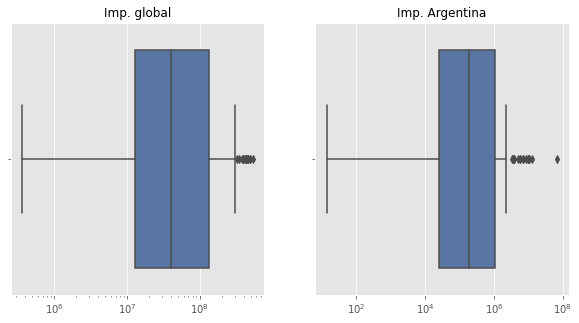

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.set_theme(style="ticks")
sns.boxplot(df[df.last_value < df.last_value.quantile(.75)]["last_value"], ax=ax[0])
ax[0].set_title("Imp. global")
ax[0].set(xlabel='', ylabel='')
ax[0].set_xscale("log")
ax[0].xaxis.grid(True)
sns.boxplot(df[df.ARG_value > df.ARG_value.quantile(.01)]["ARG_value"], ax=ax[1])
ax[1].set_title("Imp. Argentina")
ax[1].set(xlabel='', ylabel='')
ax[1].set_xscale("log")
ax[1].xaxis.grid(True)

In [ ]:
## Media de cada variable
df[numericas].mean(axis=0).apply(lambda x: format(x, '.2f'))

value          4592311151.52
media_value     955092396.77
last_value     1058428431.61
ARG_value         1325137.43
UE_value       2776250716.82
CHN_value       367649461.63
Resto_value    1447085835.64
ARG_part                0.09
UE_part                57.97
CHN_part               12.07
Resto_part             29.86
D1                      1.30
D2                     25.58
D3                      7.76
D4                      2.61
D5                     49.95
D6                     50.05
D7               44654160.04
E3                  15408.57
E5                      3.32
E6                      1.99
E7                      6.95
C2                     87.47
S3                     71.06
S4                     20.19
S5                     18.16
S7                     17.82
S12                   351.41
G1                    236.90
G2                      0.32
G3                      0.68
G4                      0.07
G5                   1147.96
G6                      0.53
G7            

In [ ]:
## Varianza de cada variable
df[numericas].var(axis=0).apply(lambda x: format(x, '.2f'))

value          213886235383906729984.00
media_value      9000668236778326016.00
last_value      11371988075228909568.00
ARG_value             33087196496305.04
UE_value        52443878387663265792.00
CHN_value        1911793370154094080.00
Resto_value     51946368460677013504.00
ARG_part                           0.19
UE_part                          449.97
CHN_part                          91.42
Resto_part                       336.18
D1                                 1.24
D2                               735.14
D3                                 7.79
D4                                 1.67
D5                                12.12
D6                                12.12
D7                 24378917088136264.00
E3                         399615029.31
E5                                 7.32
E6                                 8.22
E7                                25.85
C2                              2696.07
S3                               432.34
S4                               367.07


Vemos que tanto la media como la varianza de las variables son muy disímiles.
Debido a esto, será necesario escalar los datos para mejorar la precisión de las técnicas aplicadas posteriormente (PCA y K-means).

## Análisis del comercio internacional de equipamiento médico
--------------------------------------------------------------------------------

In [ ]:
## Mayores importadores a nivel mundial en el ultimo año en montos absolutos, ordenados de manera descendente: 
print(df.sort_values('media_value',ascending=False)["pais_x"].head(20).values)

['Estados Unidos' 'China' 'Japón' 'Francia' 'Países Bajos' 'Alemania'
 'Italia' 'Reino Unido de Gran Bretaña e Irlanda del Norte' 'Canadá'
 'Australia' 'Corea' 'México' 'Brasil' 'España' 'Rusia' 'Irlanda'
 'Hong Kong (región administrativa especial de China)' 'Singapur' 'Suiza'
 'Austria']


In [ ]:
df.last_value.sum()

170406977489

In [ ]:
df.media_value.head(20).sum()/df.media_value.sum()*100

6.066151327089091

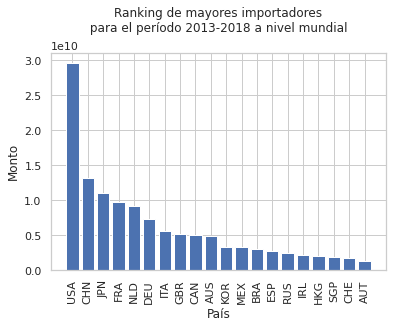

In [ ]:
## Vamos a realizar un gráfico de barras para ver los principales importadores en valores promedio a nivel mundial.

#Cantidad de columnas a mostrar
nro_columnas = 20
sns.set_style("whitegrid")
 
# Declaramos valores para el eje x
eje_x = df[(df["media_value"]>0)].sort_values(by="media_value", ascending=False).head(nro_columnas)["iso_pais"].to_list()
 
# Declaramos valores para el eje y
eje_y = df[(df["media_value"]>0)].sort_values(by="media_value", ascending=False).head(nro_columnas)["media_value"].to_list()
 
# Creamos Gráfica
plt.bar(eje_x, eje_y)
# Legenda en el eje y
plt.ylabel('Monto')
# Legenda en el eje x
plt.xlabel('País')
#Rotamos el eje x
plt.xticks(range(len(eje_x)), eje_x, rotation='vertical')
# Título de Gráfica
plt.title('Ranking de mayores importadores\n para el período 2013-2018 a nivel mundial \n')
# Mostramos Gráfica
plt.show()

In [ ]:
df.describe()

,value,media_value,last_value,ARG_value,UE_value,CHN_value,Resto_value,ARG_part,UE_part,CHN_part,Resto_part,D1,D2,D3,D4,D5,D6,D7,E3,E5,E6,E7,C2,S3,S4,S5,S7,S12,G1,G2,G3,G4,G5,G6,G7,G8
count,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
mean,"4,592,311,152","955,092,397","1,058,428,432","1,325,137","2,776,250,717","367,649,462","1,447,085,836",0,58,12,30,1,26,8,3,50,50,"44,654,160","15,409",3,2,7,87,71,20,18,18,351,237,0,1,0,"1,148",1,0,0
std,"14,624,849,927","3,000,111,371","3,372,237,844","5,752,147","7,241,814,578","1,382,676,162","7,207,382,913",0,21,10,18,1,27,3,1,3,3,"156,137,494","19,990",3,3,5,52,21,19,6,14,349,340,0,4,0,"1,788",0,0,0
min,"365,163","345,071","365,163",0,"103,025","15,709","166,240",0,2,0,1,-1,2,2,1,25,46,"21,729",292,-8,-10,0,1,26,1,8,0,0,0,0,0,0,21,0,0,0
25%,"82,710,351","20,201,065","20,390,953",0,"34,968,538","9,485,274","18,929,774",0,45,5,17,0,6,6,2,50,49,"2,873,457","2,222",2,1,3,43,60,5,14,4,90,36,0,0,0,109,0,0,0
50%,"382,898,130","92,164,295","86,750,229","43,913","186,122,537","45,780,870","97,347,326",0,60,10,27,1,14,7,2,50,50,"9,702,353","6,151",3,2,6,85,77,12,18,16,248,118,0,0,0,379,1,0,0
75%,"2,551,450,004","518,327,292","592,675,407","605,553","1,476,702,111","235,293,326","638,648,810",0,72,16,39,2,37,10,3,51,50,"32,165,485","20,200",5,4,9,132,88,26,22,30,537,274,0,0,0,"1,190",1,0,0
max,"147,827,568,485","29,565,513,697","33,747,047,458","68,249,339","45,763,083,736","15,319,467,694","86,734,466,188",5,97,47,97,5,122,16,7,54,75,"1,386,395,000","104,499",11,8,27,187,95,65,31,51,"2,165","2,783",1,46,0,"9,818",1,1,0


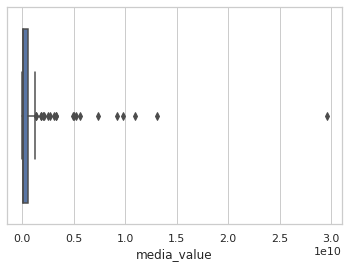

In [ ]:
# Distribución del valor medio de importaciones del dataset.
# Se visualizan varios outliers, en particular los importadores más importantes a nivel mundial.
sns.boxplot(df["media_value"])

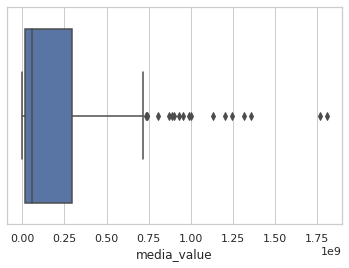

In [ ]:
## Se observa gran asimetria en el volumen comerciado por los países.
sns.boxplot(df["media_value"][df["media_value"] < df["media_value"].quantile(0.9)])
#### EXPLICAR

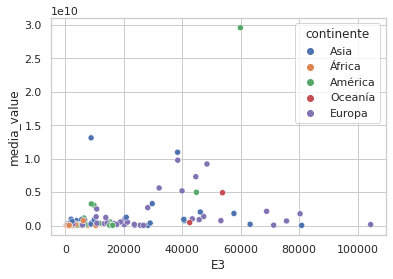

In [ ]:
## Relación entre PBI per capita e importaciones por continente.
## Observamos que EEUU es un gran outlier.
sns.scatterplot(data=df[df.media_value > df.media_value.quantile(.25)], x="E3", y="media_value", hue="continente")

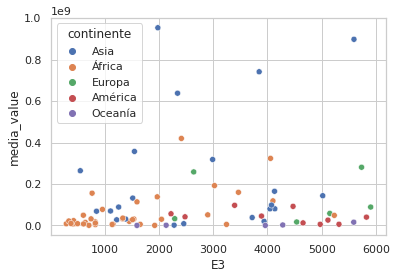

In [ ]:
## Relación entre PBI per capita e importaciones.
sns.scatterplot(data=df[df["E3"] < df["E3"].quantile(.5)], x="E3", y="media_value", hue="continente")

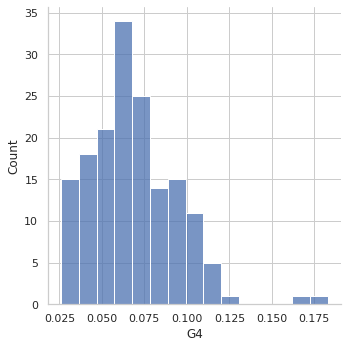

In [ ]:
## Distribución del gasto en salud como % del PBI.
sns.displot(df, x="G4")

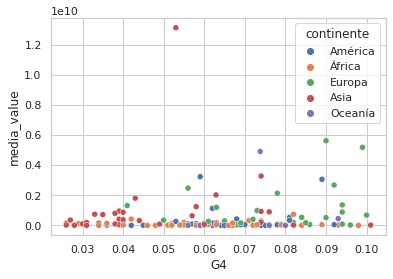

In [ ]:
## Relación entre gasto en salud como porcentaje del PBI e importaciones medias.
## No es determinante, pero a mayor gasto en salud, mayor valor de importaciones.
sns.scatterplot(data=df[df["G4"] < df["G4"].quantile(.9)], x="G4", y="media_value", hue="continente")

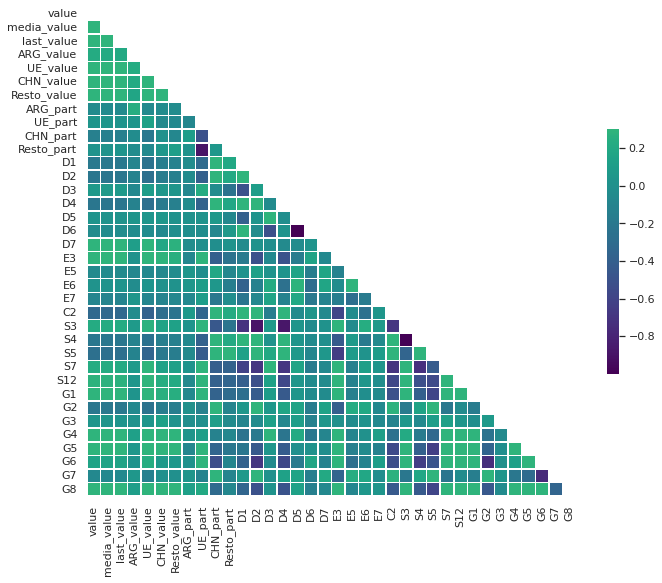

In [ ]:
## Matriz de Correlación de las variables 
sns.set_theme(style="white")
# Compute the correlation matrix
corr = df[numericas].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(200, 100, as_cmap=True)
# cmap = sns.color_palette("viridis", as_cmap=True)
cmap = sns.color_palette("viridis", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Resulta muy interesante la fuerte correlación negativa entre EU_Part y Resto_Part. Esto estaría indicando que importar del resto del mundo (No Europa y EEUU) es excluyente para las importaciones provenientes de los países centrales.

In [ ]:
## Los paises con más importaciones de origen europeo o de Estados Unidos.
##QUIZAS ESTA DE MAS POR LOS GRAFICOS DE ABAJO QUE MUESTRAN LO MISMO 
df_comex[(df_comex["UE_part"]>0)].sort_values(by="UE_part", ascending=False).head(20).round(2)

,iso_pais,pais,continente,value,media_value,last_value,ARG_value,UE_value,CHN_value,Resto_value,ARG_part,UE_part,CHN_part,Resto_part
59,GRL,Dinamarca,América,11302378,"2,260,476",2789591,0,10954819,40985,306574,0,97,0,3
19,BHS,Bahamas,América,22318320,"11,159,160",10638860,0,21308438,19779,990103,0,95,0,4
125,PRT,Portugal,Europa,2591636461,"518,327,292",634261636,678135,2469212561,48383983,73361782,0,95,2,3
82,KNA,San Cristóbal y Nevis,América,7209028,"1,802,257",2229687,0,6865409,58451,285168,0,95,1,4
92,LVA,Letonia,Europa,622219043,"124,443,809",156679693,30106,576054580,22322319,23812038,0,93,4,4
57,GMB,Gambia,África,3195074,"798,768",408574,0,2917791,111043,166240,0,91,3,5
142,SUR,Suriname,América,29882370,"5,976,474",5894094,0,27014301,451719,2416350,0,90,2,8
8,ATG,Antigua y Barbuda,América,16690793,"3,338,159",4939326,0,15043114,508520,1139159,0,90,3,7
4,AND,Andorra,Europa,46198962,"9,239,792",10398944,0,41541216,323740,4334006,0,90,1,9
90,LTU,Lituania,Europa,1507640496,"301,528,099",347986592,46147,1343507836,58939673,105146840,0,89,4,7


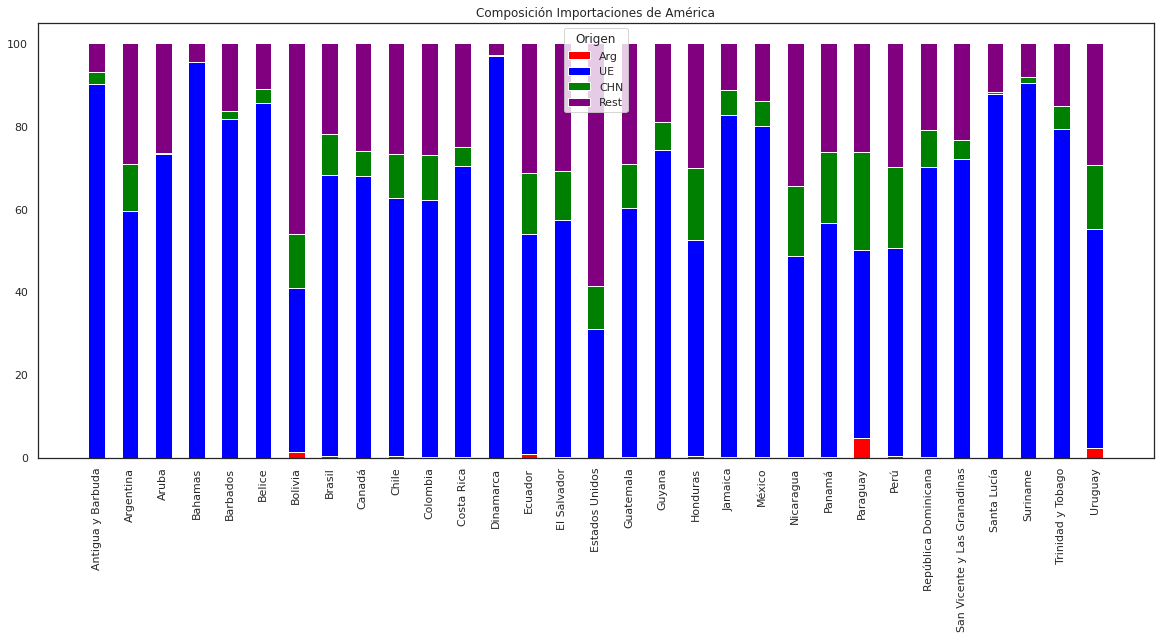

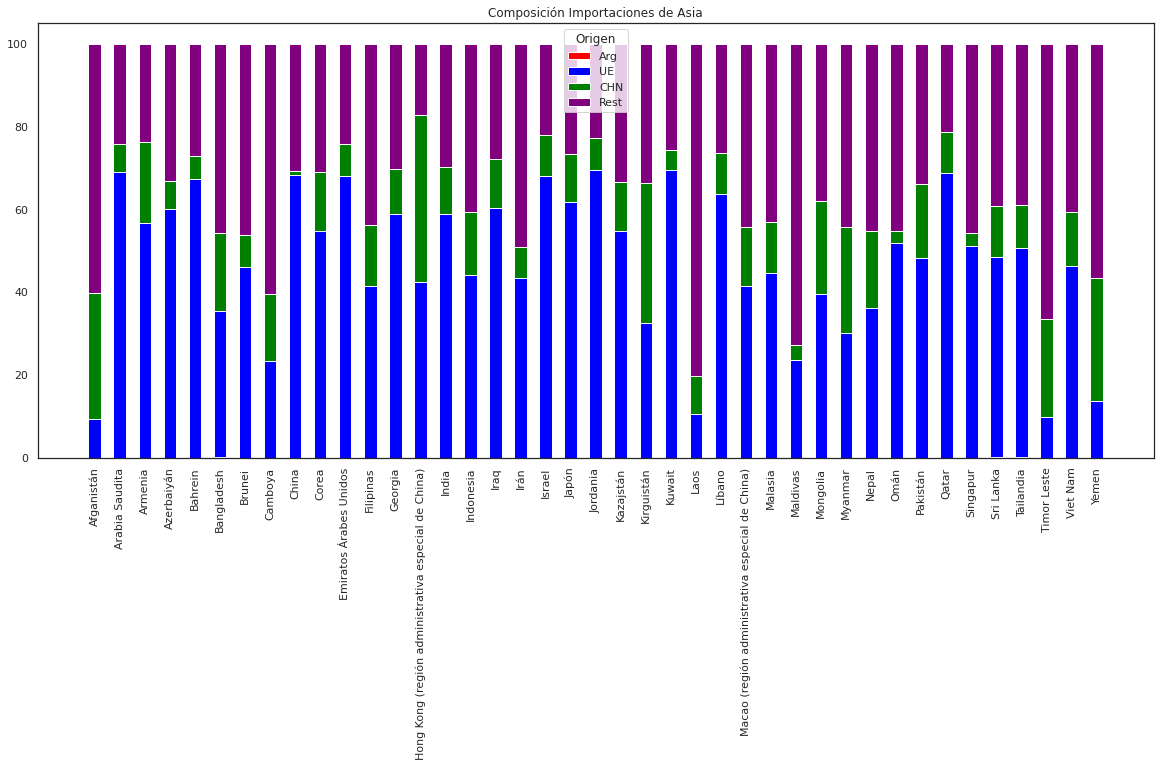

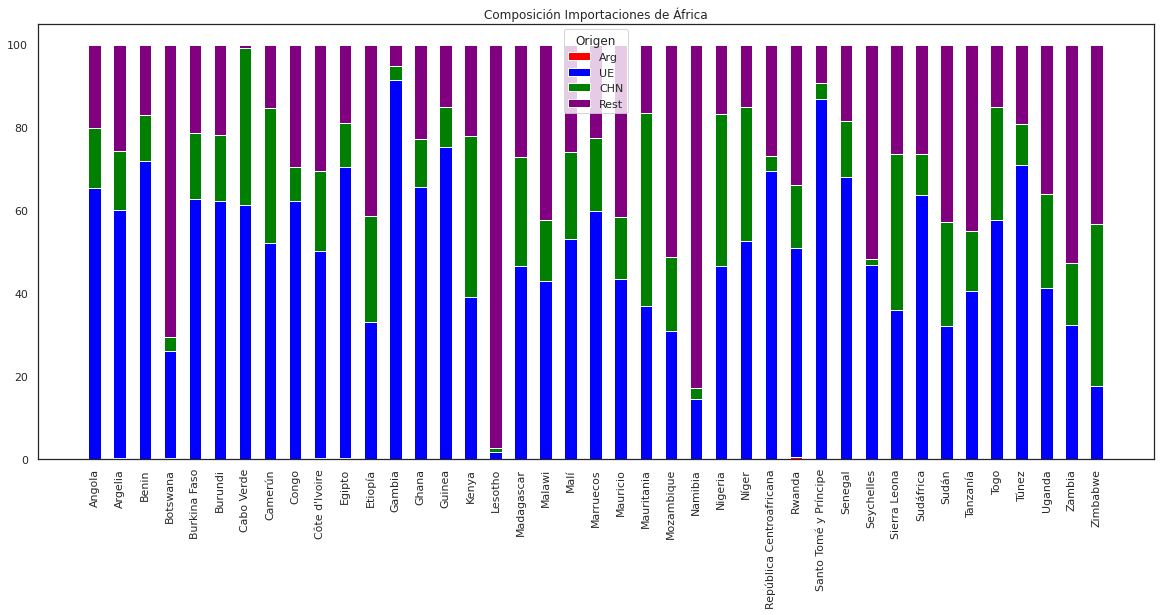

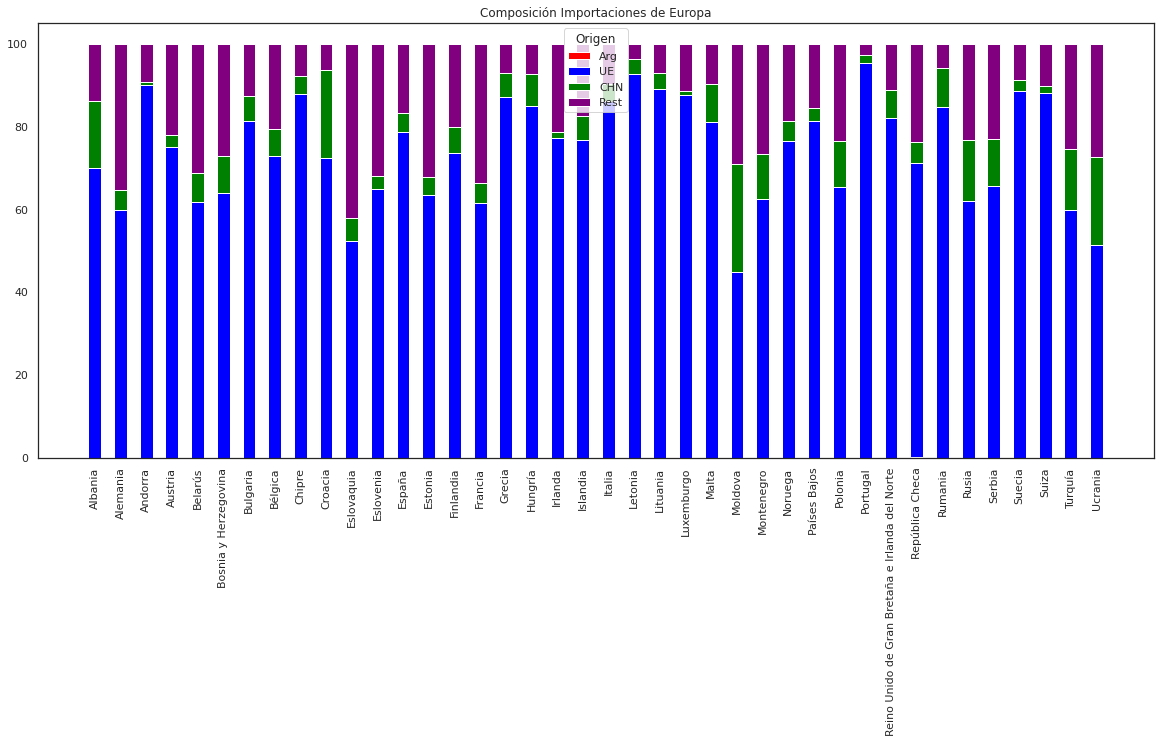

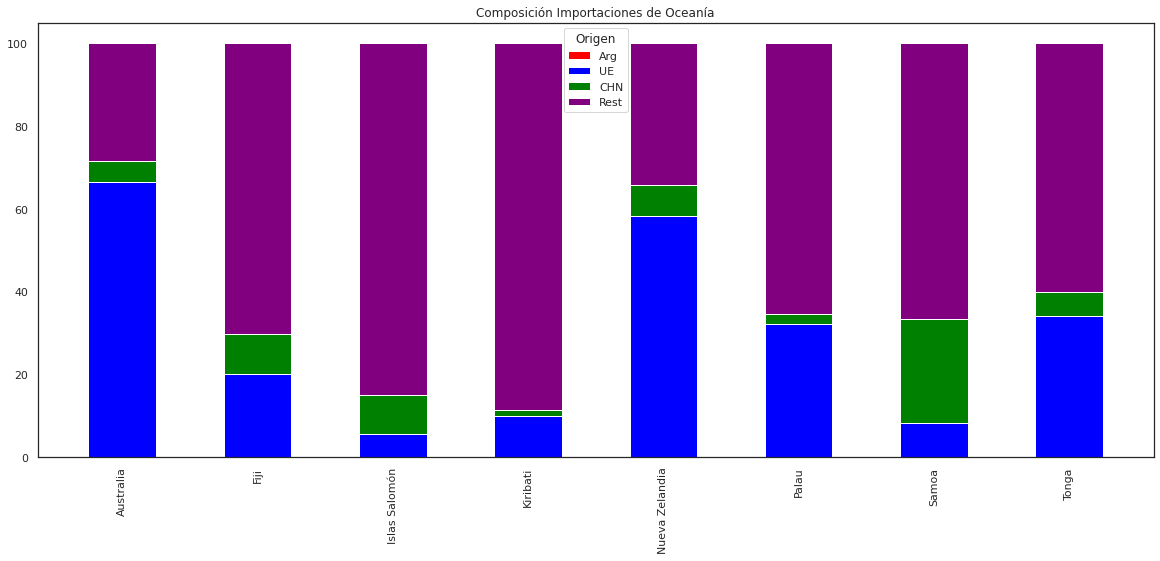

In [ ]:
## Vamos a analizar la composición de las importaciones atendiendo a los distintos continentes. 
## Con esto veremos si la ubicación de un país es influyente en cuanto a los origenes de sus importaciones.

#Lista de continentes
continentes = df['continente'].unique()

for c in continentes:
    x = sorted(list(df[df['continente']==c]['pais_x'].unique()))
    y_0 = []
    y_1 = []
    y_2 = []
    y_3 = []
    acum_y1 = []
    acum_y2 = []

    for i in x:
        
        rate_0 = float(df.loc[df['pais_x'] == i]['ARG_part'])
        rate_1 = float(df.loc[df['pais_x'] == i]['UE_part'])
        rate_2 = float(df.loc[df['pais_x'] == i]['CHN_part'])
        rate_3 = float(df.loc[df['pais_x'] == i]['Resto_part'])
        y_0.append(rate_0)
        y_1.append(rate_1)
        y_2.append(rate_2)
        y_3.append(rate_3)
        acum_y1.append(rate_0 + rate_1)
        acum_y2.append(rate_0 + rate_1+ rate_2)
      
    cantidad_paises_por_continente = len(df[df['continente']==c]['pais_x'].unique())

    # Usamos bar () para dibujar un gráfico de columnas apiladas
    plt.figure(figsize=(20,8))
    plt.bar(range(len(x)), y_0, width=0.5, color='red', label=0)
    plt.bar(range(len(x)), y_1, width=0.5, color='blue', label=1, bottom=y_0)
    plt.bar(range(len(x)), y_2, width=0.5, color='green', label=2, bottom=acum_y1)
    plt.bar(range(len(x)), y_3, width=0.5, color='purple', label=3, bottom=acum_y2)
    plt.title(f"Composición Importaciones de {c}")
    #plt.xlabel("Países")
    plt.xticks(range(len(x)), x, rotation='vertical')
    plt.legend(['Arg','UE','CHN','Rest'],title='Origen', loc='upper center', )
    plt.show()

Se utilizó el gráfico de columnas apiladas para observar la composición de las importaciones por país, segmentado por continente. Las columnas se hicieron con la misma longitud, para poder prestar atención a la composición y no al valor bruto de importaciones.

Se puede observar que el continente tiende a definir la composición en la participación. 
El gráfico muestra que Europa tiene mayor participación de importaciones europeas, Asia muestra mayor participaciones en importaciones Chinas, y el resto de los continentes muestran mayor participación del resto del mundo.

Por último, la participación de Argentina solo puede observarse en la composición de América. 


In [ ]:
df.groupby('continente')[['UE_part','ARG_part','CHN_part','Resto_part']].describe()

UE_part                           ... Resto_part                        
             count mean std min 25% 50% 75%  ...       mean std min 25% 50% 75% max
continente                                   ...                                   
América         31   68  17  31  55  68  81  ...         23  12   3  14  26  29  59
Asia            41   47  18   9  40  48  60  ...         39  14  17  27  38  45  80
Europa          40   74  13  45  64  76  85  ...         18  10   3  10  18  26  42
Oceanía          8   29  23   6  10  26  40  ...         62  21  28  54  66  74  89
África          41   51  19   2  39  52  64  ...         31  20   1  18  26  42  97

[5 rows x 32 columns]

El objetivo era comprender como se componen las importaciones de Argentina por continente, y destacar principales compradores. 

Entre los resultados de principales compradores por continente se muestra que Francia tiene más del 25% de los valores comerciados a Europa, el 45% de América lo tiene Brasil, el 43,9% de África lo tiene Egipto y más del 90% de lo comerciado con Oceanía se hace con Australia. 


--------------------------------------------------------------------------------
## Argentina en el comercio internacional de equipamientos médicos.

Empezamos con un análisis acerca de los países que más comercian y aquellos que no tienen comercio directo con Argentina.

In [ ]:
print(f'Argentina exportó en el período 2013-2018 u$d {df["ARG_value"].sum()} de equipamiento médicos al mundo \
a un total de {len(df[df["ARG_value"] > 0])} países.')


Argentina exportó en el período 2013-2018 u$d 213347127 de equipamiento médicos al mundo a un total de 114 países.


In [ ]:
round(df["ARG_value"].sum()/df.media_value.sum()*100,2)

0.14

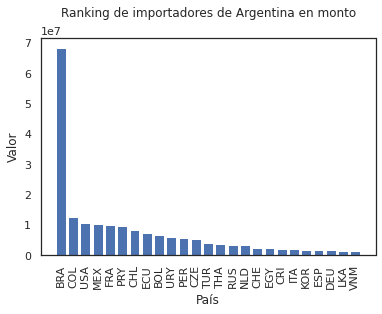

In [ ]:
## Gráfico de barras para ver los principales importadores de Argentina.

#Cantidad de columnas a mostrar
nro_columnas = 25
 
# Declaramos valores para el eje x
eje_x = df[(df["ARG_value"]>0)].sort_values(by="ARG_value", ascending=False).head(nro_columnas)["iso_pais"].to_list()
 
# Declaramos valores para el eje y
eje_y = df[(df["ARG_value"]>0)].sort_values(by="ARG_value", ascending=False).head(nro_columnas)["ARG_value"].to_list()
 
# Creamos Gráfica
plt.bar(eje_x, eje_y)
# Legenda en el eje y
plt.ylabel('Valor')
# Legenda en el eje x
plt.xlabel('País')
#Rotamos el eje x
plt.xticks(range(len(eje_x)), eje_x, rotation='vertical')
# Título de Gráfica
plt.title('Ranking de importadores de Argentina en monto\n')
# Mostramos Gráfica
plt.show()



* Se puede observar que en su mayoría son países de América Latina, información que también veíamos en el gráfico de barras apiladas para este continente.  
* Brasil es el principal comprador en montos absolutos. 
* Brasil, EEUU, México, Francia, Rusia, Suiza, Países Bajos, Alemania, Italia, Corea, España, son países que identificamos dentro de los 20 que más importan en promedio a nivel mundial y están también dentro del ranking de países a los que Argentina más le exporta.

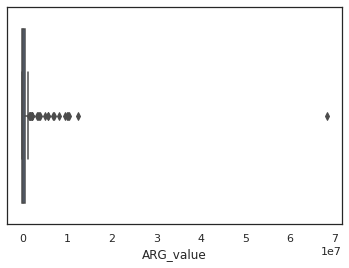

In [ ]:
sns.boxplot(df["ARG_value"])

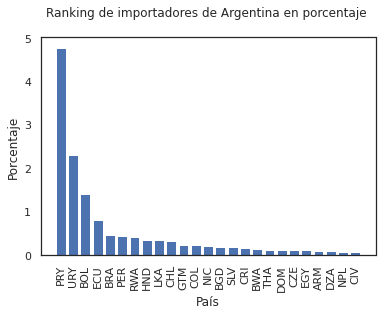

In [ ]:
#Cantidad de columnas a mostrar
nro_columnas = 25
 
# Declaramos valores para el eje x
eje_x = df[(df["ARG_part"]>0)].sort_values(by="ARG_part", ascending=False).head(nro_columnas)["iso_pais"].to_list()
 
# Declaramos valores para el eje y
eje_y = df[(df["ARG_part"]>0)].sort_values(by="ARG_part", ascending=False).head(nro_columnas)["ARG_part"].to_list()
 
# Creamos Gráfica
plt.bar(eje_x, eje_y)
# Legenda en el eje y
plt.ylabel('Porcentaje')
# Legenda en el eje x
plt.xlabel('País')
# Rotamos el eje x
plt.xticks(range(len(eje_x)), eje_x, rotation='vertical')
# Título de Gráfica
plt.title('Ranking de importadores de Argentina en porcentaje \n')
# Mostramos Gráfica
plt.show()


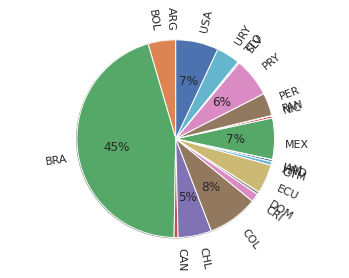

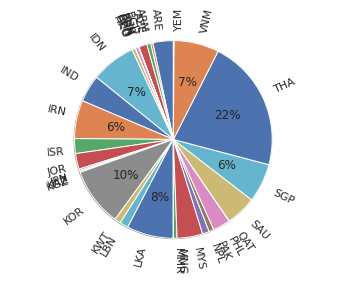

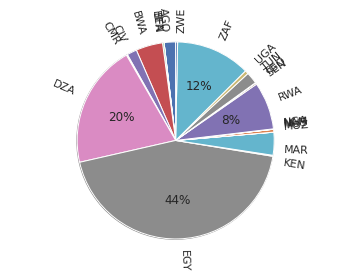

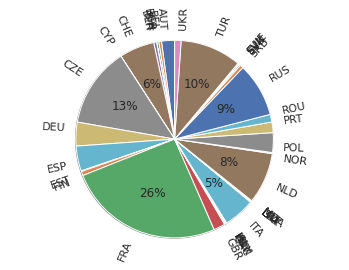

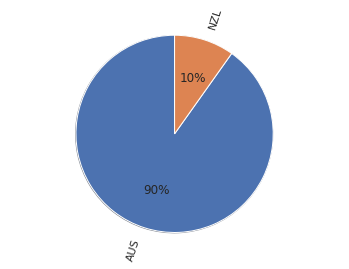

In [ ]:
## Vamos a revisar ahora la composición de los valores de importación de Argentina en cada país en cada continente 

# Función para mostrar porcentajes mayor a determinado %
# https://stackoverflow.com/questions/63704956/pie-chart-show-percentage-of-specific-values
def autopct(pct): # mostrar solo el porcentaje si es mayor a > 5%
    return ('%.f%%' % pct) if pct > 5 else ''

# Armo un loop para cada continente, que traiga los códigos ISO solo de los países que importan más que 0
for c in continentes:
    x = sorted(list(df[df['continente']==c][df['ARG_value'] > 0]['iso_pais'].unique()))
    Arg_values_by_country = []


    for i in x: 
        valor_pais = df.loc[df['iso_pais'] == i]['ARG_value'].values[0]
        Arg_values_by_country.append(valor_pais)

    #Acá hago toda la definición del gráfico
    fig1, ax1 = plt.subplots()

    ax1.pie(Arg_values_by_country, labels=x, autopct=autopct, radius= 5,
            shadow=True, startangle=90, rotatelabels =True, labeldistance= 1.1)
    ax1.axis('equal') 
    #plt.title(f"Composición Importaciones argentinas en continente {c}")
    plt.show()


In [ ]:
## Países que más importan productos argentinos en valor absoluto. 
RI = 605553.00 #Recorrido intercuartílico
LS = RI + 1.5 * RI 
LS

print(f' Los {len(df[(df["ARG_value"]>LS)].sort_values(by="ARG_value", ascending=False).round(2))} países que más importaron productos argentinos son:')
print(df[(df["ARG_value"]>LS)].sort_values(by="ARG_value", ascending=False).pais_x.values)

 Los 23 países que más importaron productos argentinos son:
['Brasil' 'Colombia' 'Estados Unidos' 'México' 'Francia' 'Paraguay'
 'Chile' 'Ecuador' 'Bolivia' 'Uruguay' 'Perú' 'República Checa' 'Turquía'
 'Tailandia' 'Rusia' 'Países Bajos' 'Suiza' 'Egipto' 'Costa Rica' 'Italia'
 'Corea' 'España' 'Alemania']


In [ ]:
## Y los países en los que las importaciones argentinas representan un mayor % de sus importaciones totales son:
df_comex[(df_comex["ARG_part"]>0)].sort_values(by="ARG_part", ascending=False).head(20).round(2)
## Vemos un claro predominio de países de Latinoamérica y el Caribe.

,iso_pais,pais,continente,value,media_value,last_value,ARG_value,UE_value,CHN_value,Resto_value,ARG_part,UE_part,CHN_part,Resto_part
126,PRY,Paraguay,América,201509697,"40,301,939",47276032,9617080,91528044,47666850,52697723,5,45,24,26
158,URY,Uruguay,América,254119245,"50,823,849",52603315,5815746,134657354,39216271,74429874,2,53,15,29
23,BOL,Bolivia,América,486447853,"97,289,571",91566244,6768903,192412497,63796718,223469735,1,40,13,46
45,ECU,Ecuador,América,895331044,"179,066,209",186211132,7162935,476513696,130873659,280780754,1,53,15,31
24,BRA,Brasil,América,15279097415,"3,055,819,483",3175497570,68249339,10360710422,1492423314,3357714340,0,68,10,22
121,PER,Perú,América,1315724309,"263,144,862",281035395,5650553,659741604,257473034,392859118,0,50,20,30
132,RWA,Rwanda,África,95775781,"31,925,260",29192239,386780,48385694,14533265,32470042,0,51,15,34
63,HND,Honduras,América,167387608,"41,846,902",41748693,576923,87319326,28996777,50494582,0,52,17,30
88,LKA,Sri Lanka,Asia,394021590,"98,505,398",95117967,1320329,190055560,48704181,153941520,0,48,12,39
31,CHL,Chile,América,2656417038,"531,283,408",592675407,8276889,1654965787,285959221,707215141,0,62,11,27


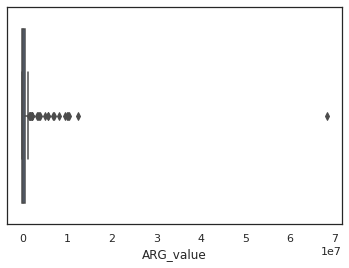

In [ ]:
## Vemos la distribucion del monto en valor absoluto de las exportaciones argentinas
S = df["ARG_value"]

sns.boxplot(x=S)

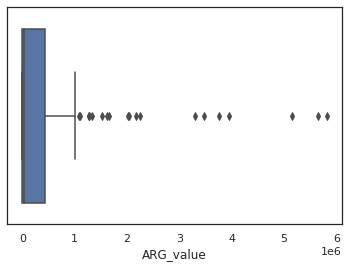

In [ ]:
## Sin el 5% mayor, para quitar outliers y mejorar la visualización.
S = df["ARG_value"]

sns.boxplot(x=S[S < S.quantile(.95)])
# Observamos aún una gran asimetría en los destinos.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
S.describe()

count        161.0
mean     1325137.4
std      5752147.1
min            0.0
25%            0.0
50%        43913.0
75%       605553.0
max     68249339.0
Name: ARG_value, dtype: float64

112


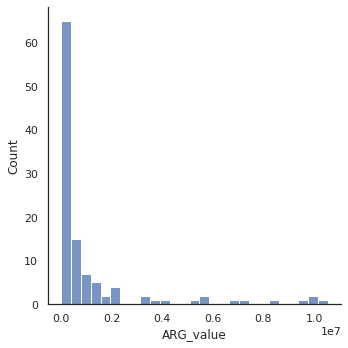

In [ ]:
print(len(df[(df["ARG_value"] > 0) & (df["ARG_value"] < df["ARG_value"].quantile(.99))])) 
df_plot = df[(df["ARG_value"] > 0) & (df["ARG_value"] < df["ARG_value"].quantile(.99))] # Elimanando los principales outliers
sns.displot(df_plot, x="ARG_value")

In [ ]:
## A estos países no exportamos. Lista de países con los que no comerciamos
print("-No se comercia con ",len(df_comex[(df_comex['ARG_value']==0)]),"países.")
print("\n-Lista de los países con los que no se comercia: ",df_comex[(df_comex['ARG_value']==0)]["pais"].to_list())
#df_comex[(df_comex["ARG_value"]==0)].count()

-No se comercia con  50 países.

-Lista de los países con los que no se comercia:  ['Aruba', 'Afganistán', 'Albania', 'Andorra', 'Antigua y Barbuda', 'Burundi', 'Bahamas', 'Belice', 'Barbados', 'República Centroafricana', 'Congo', 'Cabo Verde', 'Etiopía', 'Fiji', 'Ghana', 'Guinea', 'Gambia', 'Dinamarca', 'Guyana', 'Iraq', 'Camboya', 'Kiribati', 'San Cristóbal y Nevis', 'Laos', 'Santa Lucía', 'Lesotho', 'Macao (región administrativa especial de China)', 'Madagascar', 'Maldivas', 'Malí', 'Montenegro', 'Mauritania', 'Malawi', 'Níger', 'Omán', 'Palau', 'Francia', 'Sudán', 'Islas Salomón', 'Sierra Leona', 'Santo Tomé y Príncipe', 'Suriname', 'Swazilandia', 'Seychelles', 'Timor Leste', 'Tonga', 'Tanzanía', 'San Vicente y Las Granadinas', 'Samoa', 'Zambia']


In [ ]:
df_comex["Rank_Value"] = df_comex.media_value.rank(ascending=False)

In [ ]:
## Vemos estos paises, ordenados por su nivel de importaciones en valor absoluto, ordenados de mayor a menor.
df_comex[(df_comex["ARG_value"]==0)].sort_values(by="Rank_Value").head(10).round(2)

,iso_pais,pais,continente,value,media_value,last_value,ARG_value,UE_value,CHN_value,Resto_value,ARG_part,UE_part,CHN_part,Resto_part,Rank_Value
1,AFG,Afganistán,Asia,792061147,264020382.3,534490822,0,74576272,241478377,476006498,0.0,9.4,30.5,60.1,57.0
49,ETH,Etiopía,África,467340042,155780014.0,113944394,0,154099385,119617554,193623103,0.0,33.0,25.6,41.4,70.0
70,IRQ,Iraq,Asia,143490173,143490173.0,143490173,0,86674664,16826119,39989390,0.0,60.4,11.7,27.9,72.0
118,OMN,Omán,Asia,382898130,95724532.5,82389917,0,198378090,11492227,173027813,0.0,51.8,3.0,45.2,81.0
155,TZA,Tanzanía,África,388122331,77624466.2,78456738,0,157458281,56028301,174635749,0.0,40.6,14.4,45.0,87.0
134,SDN,Sudán,África,102656482,51328241.0,57518002,0,33008125,25679715,43968642,0.0,32.1,25.0,42.8,94.0
80,KHM,Camboya,Asia,93707443,31235814.3,30191004,0,21962533,15208348,56536562,0.0,23.4,16.2,60.3,112.0
55,GHA,Ghana,África,90822064,30274021.3,28472305,0,59649663,10489253,20683148,0.0,65.7,11.6,22.8,113.0
165,ZMB,Zambia,África,112668521,28167130.2,39982732,0,36352888,17007746,59307887,0.0,32.3,15.1,52.6,114.0
93,MAC,Macao (región administrativa especial de China),Asia,82710351,27570117.0,24247723,0,34298732,11821086,36590533,0.0,41.5,14.3,44.2,115.0


In [ ]:
df[(df_comex["ARG_value"]==0)].describe()

,value,media_value,last_value,ARG_value,UE_value,CHN_value,Resto_value,ARG_part,UE_part,CHN_part,Resto_part,D1,D2,D3,D4,D5,D6,D7,E3,E5,E6,E7,C2,S3,S4,S5,S7,S12,G1,G2,G3,G4,G5,G6,G7,G8
count,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
mean,3492700296.3,705729157.8,802876499.4,954590.1,2337654172.4,298824258.1,855267275.7,0.1,61.7,12.5,25.7,1.4,29.3,7.9,2.8,50.3,49.7,16125421.6,15153.4,2.8,1.4,7.6,96.6,67.2,23.3,18.2,16.4,342.1,224.5,0.3,0.6,0.1,1052.9,0.5,0.4,0.1
std,9945362734.1,1987577033.4,2234185659.6,2536111.5,7063029006.3,765337003.3,2642603976.0,0.7,22.5,12.3,19.0,1.1,31.5,2.5,1.5,2.0,2.0,25797736.5,20923.1,2.5,2.6,5.4,49.6,22.2,20.7,5.2,13.3,367.5,297.5,0.2,2.2,0.0,1534.6,0.2,0.2,0.0
min,1035214.0,345071.3,408574.0,0.0,103025.0,15709.0,166240.0,0.0,1.6,0.1,0.9,-0.4,2.1,2.8,1.1,42.6,46.0,76965.0,292.0,-3.1,-5.6,0.3,4.0,26.0,1.3,7.8,0.5,0.2,0.2,0.0,0.0,0.0,24.3,0.1,0.0,0.0
25%,27633671.8,6857626.4,7287180.0,0.0,16859098.8,946616.5,4424696.0,0.0,49.3,3.3,14.8,0.4,7.4,6.2,1.7,49.9,49.1,588102.5,1529.1,1.5,0.7,3.2,61.6,42.5,9.5,15.6,2.0,82.0,25.9,0.2,0.2,0.1,102.6,0.4,0.3,0.1
50%,124235112.5,34026972.9,30365427.0,667.0,57570941.0,11839609.5,33187737.0,0.0,62.3,7.4,23.1,1.2,14.3,7.7,2.1,50.5,49.5,5473723.0,5570.6,2.8,1.8,6.6,96.5,73.8,14.1,17.3,14.4,266.1,119.4,0.4,0.3,0.1,322.1,0.5,0.4,0.1
75%,1297584108.5,263363741.9,398690828.8,298379.8,660866491.2,178705691.5,364380796.8,0.0,79.4,19.9,30.1,2.3,49.3,9.8,3.6,50.9,50.1,17483967.0,19376.4,4.3,2.9,10.4,138.5,83.5,40.2,21.9,26.5,447.2,247.0,0.4,0.4,0.1,1175.1,0.7,0.5,0.1
max,48847713535.0,9769542707.0,11237138847.0,10159893.0,37366173837.0,4079288891.0,16419347704.0,4.8,95.5,46.7,97.4,3.8,121.5,14.5,7.2,54.0,57.4,129163276.0,104498.7,10.6,7.8,23.6,183.0,95.0,63.7,29.8,45.9,2165.0,1570.7,0.8,15.4,0.1,6236.0,1.0,0.8,0.2


--------------------------------------------------------------------------------
# **Analisis PCA**
--------------------------------------------------------------------------------
Reducción de dimensionalidad y selección de variables principales (mayor peso explicativo sobre la varianza del dataset).

In [ ]:
# Revisar
RANDOM_STATE = 42
df2 = df.drop(index = 153, axis=0).copy() 
## Eliminamos Estados Unidos por ser EL outlier del dataset, pero además entendiendo el objetivo del trabajo 
## no representa un destino potencial para nuestras exportaciones. 
df2 = df2[numericas].copy()
#df2 = df2.fillna(df.mean())
# df2.dropna(axis=1) # saca por calumna
df2

,value,media_value,last_value,ARG_value,UE_value,CHN_value,Resto_value,ARG_part,UE_part,CHN_part,Resto_part,D1,D2,D3,D4,D5,D6,D7,E3,E5,E6,E7,C2,S3,S4,S5,S7,S12,G1,G2,G3,G4,G5,G6,G7,G8
0,44565273,8913054.6,13822425,0,32694844,40408,11830021,0.0,73.4,0.1,26.5,0.4,12.2,8.9,1.8,52.5,47.5,105264.0,25655.1,1.3,0.9,11.8,92.8,72.2,14.5,17.2,33.3,342.1,238.1,0.3,0.3,0.1,1289.0,0.6,0.4,0.1
1,792061147,264020382.3,534490822,0,74576272,241478377,476006498,0.0,9.4,30.5,60.1,2.5,67.9,6.6,4.5,48.5,51.5,35530081.0,550.1,2.7,0.1,1.5,167.0,44.1,36.4,29.8,2.8,144.2,47.1,0.8,0.6,0.1,60.1,0.1,0.8,0.0
2,237428801,118714400.5,70214828,93356,155144540,34415249,47775656,0.0,65.3,14.5,20.1,3.3,81.1,8.4,5.6,51.0,49.0,29784193.0,4100.3,-0.1,-3.4,7.3,173.0,27.4,63.4,16.5,2.1,65.3,36.2,0.3,0.2,0.0,108.6,0.5,0.5,0.1
3,84610049,16922009.8,15440800,0,59196413,13693192,11720444,0.0,70.0,16.2,13.9,-0.1,8.8,7.5,1.7,49.5,50.5,2873457.0,4537.6,3.8,3.9,13.9,63.0,93.1,2.9,17.0,26.3,440.4,151.4,0.6,0.5,0.1,265.9,0.4,0.6,0.1
4,46198962,9239792.4,10398944,0,41541216,323740,4334006,0.0,89.9,0.7,9.4,-0.4,3.3,10.0,1.5,49.9,50.1,76965.0,39146.5,1.9,2.3,10.4,57.4,74.4,15.6,10.0,33.3,2165.0,1570.7,0.4,0.2,0.1,4315.7,0.6,0.4,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,12359878,2471975.6,2189832,0,1034478,3103692,8221708,0.0,8.4,25.1,66.5,0.7,16.5,5.0,3.9,48.4,51.6,196440.0,4280.8,2.7,2.0,8.3,90.0,81.0,12.0,20.6,3.4,38.6,25.6,0.1,0.1,0.1,222.9,0.8,0.1,0.1
157,139698249,69849124.5,28063563,14582,19272186,41294817,79116664,0.0,13.8,29.6,56.6,2.4,55.4,6.4,3.9,49.5,50.5,28250420.0,1106.8,-5.9,-8.2,12.9,187.0,56.6,28.7,30.6,3.1,117.0,58.3,0.8,0.8,0.1,72.0,0.1,0.8,0.0
158,3701103417,740220683.4,774814423,605553,2354514274,368502749,977480841,0.0,63.6,10.0,26.4,1.2,37.1,9.6,2.4,50.9,49.1,56717156.0,6151.1,1.3,0.1,27.0,82.0,51.3,39.6,26.2,9.1,83.6,36.2,0.1,0.1,0.1,470.8,0.5,0.4,0.1
159,112668521,28167130.2,39982732,0,36352888,17007746,59307887,0.0,32.3,15.1,52.6,3.0,60.0,7.6,4.9,50.4,49.6,17094130.0,1513.3,3.4,0.4,7.2,87.0,29.2,60.6,17.9,0.9,55.9,19.1,0.3,0.3,0.1,69.4,0.4,0.4,0.1


In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================

# X = df[numericas].dropna() ##Nos sacamos de enciam todos los valores nulos. VER!
X = df2
pca_pipe = make_pipeline(StandardScaler(), PCA(random_state=RANDOM_STATE))
pca_pipe.fit(X)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
indice=[]
for i in range(1,X.shape[1]+1):
  var = "PC" + str(i)
  indice.append(var)  

In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X.columns,
    index   = indice)

,value,media_value,last_value,ARG_value,UE_value,CHN_value,Resto_value,ARG_part,UE_part,CHN_part,Resto_part,D1,D2,D3,D4,D5,D6,D7,E3,E5,E6,E7,C2,S3,S4,S5,S7,S12,G1,G2,G3,G4,G5,G6,G7,G8
PC1,0.2,0.2,0.2,0.0,0.2,0.1,0.2,-0.0,0.2,-0.2,-0.1,-0.2,-0.2,0.0,-0.2,0.0,-0.0,0.0,0.2,-0.0,0.0,0.0,-0.2,0.2,-0.2,-0.2,0.2,0.2,0.2,-0.1,0.0,0.1,0.2,0.2,-0.1,0.2
PC2,0.4,0.4,0.4,0.1,0.3,0.3,0.4,-0.0,-0.1,0.1,0.1,0.1,0.2,0.0,0.1,0.0,-0.0,0.2,-0.1,0.1,0.0,-0.1,0.1,-0.2,0.2,0.0,-0.1,-0.1,-0.1,0.1,0.1,0.0,-0.0,-0.1,0.1,-0.1
PC3,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.1,-0.1,0.1,0.3,0.0,-0.3,0.1,-0.4,0.4,-0.1,0.1,-0.2,-0.3,-0.1,0.1,-0.1,0.1,-0.1,-0.1,-0.1,0.0,-0.3,-0.1,-0.1,0.1,0.2,-0.3,0.0
PC4,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.1,0.1,0.0,-0.1,0.1,0.2,0.3,0.2,0.3,-0.3,-0.2,0.1,-0.2,-0.2,0.1,0.1,-0.3,0.3,-0.1,0.0,0.2,0.2,-0.1,-0.0,0.3,0.2,-0.1,-0.1,0.1
PC5,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,-0.2,-0.1,0.3,-0.2,-0.1,0.2,-0.0,0.2,-0.2,-0.1,-0.2,-0.2,-0.1,0.3,0.0,0.1,-0.0,0.2,-0.0,-0.3,-0.3,-0.3,0.0,0.1,-0.2,0.2,-0.3,0.1
PC6,0.0,0.0,0.0,0.1,0.0,0.0,0.0,-0.1,0.2,-0.1,-0.2,-0.1,-0.0,0.1,-0.1,-0.1,0.1,0.1,-0.1,-0.5,-0.4,0.3,0.1,0.1,-0.1,0.1,0.1,0.1,0.0,0.3,0.1,-0.1,-0.1,-0.1,0.3,-0.2
PC7,-0.0,-0.0,-0.1,0.3,-0.1,0.1,-0.0,0.4,-0.4,0.3,0.3,0.0,-0.1,-0.2,-0.1,0.0,-0.0,-0.2,0.0,-0.2,-0.1,-0.1,0.0,0.1,-0.1,-0.1,0.0,0.1,0.1,0.2,0.1,0.2,0.1,-0.1,0.2,0.2
PC8,0.0,0.0,0.0,0.5,0.0,-0.1,-0.0,0.5,0.3,-0.1,-0.3,0.0,-0.0,-0.1,0.0,0.0,-0.0,0.1,-0.1,0.1,0.1,0.2,0.2,-0.0,0.0,-0.2,-0.1,-0.1,-0.1,-0.1,-0.3,0.1,-0.1,-0.0,0.0,0.2
PC9,-0.0,-0.0,-0.1,0.1,-0.0,0.3,-0.1,0.2,0.2,0.2,-0.3,0.0,-0.0,0.1,0.1,-0.0,0.0,-0.2,0.0,-0.0,-0.0,-0.3,-0.1,-0.0,0.0,-0.0,0.1,-0.1,-0.2,-0.2,0.6,-0.2,-0.1,0.1,-0.2,-0.0
PC10,0.0,0.0,0.0,0.0,0.0,-0.2,0.0,0.4,-0.1,0.0,0.1,-0.1,0.2,0.5,0.0,-0.3,0.3,0.1,-0.0,-0.0,0.0,-0.1,-0.0,0.0,-0.0,0.3,0.2,0.1,0.0,-0.0,-0.1,0.3,0.0,-0.0,-0.1,-0.1


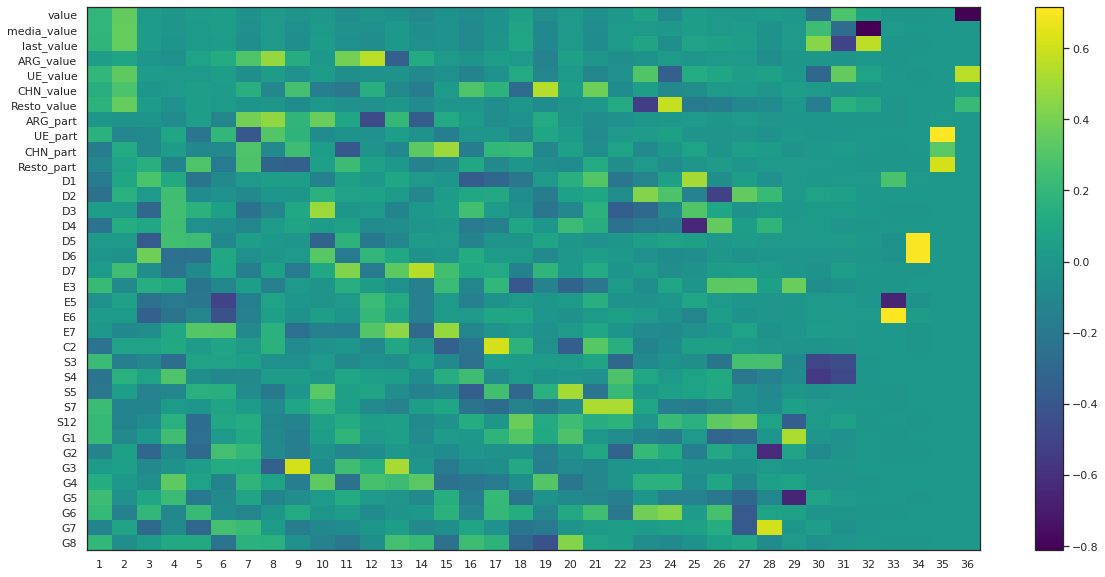

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.07580571e-01 1.23981906e-01 1.01967567e-01 6.63286239e-02
 6.41200470e-02 4.83813820e-02 4.13243724e-02 3.74972323e-02
 3.28076744e-02 2.33058215e-02 2.24393601e-02 2.01284467e-02
 1.88814361e-02 1.50152665e-02 1.41918564e-02 1.08881213e-02
 9.37110491e-03 7.58982896e-03 6.88670617e-03 5.67991453e-03
 5.08340995e-03 3.56128022e-03 2.91568666e-03 2.57443944e-03
 2.45669432e-03 1.67470368e-03 1.56229602e-03 9.65132221e-04
 3.76200561e-04 2.36118055e-04 2.00068290e-04 2.56375958e-05
 1.05363444e-06 4.08191158e-08 7.75531817e-22 3.01653624e-33]


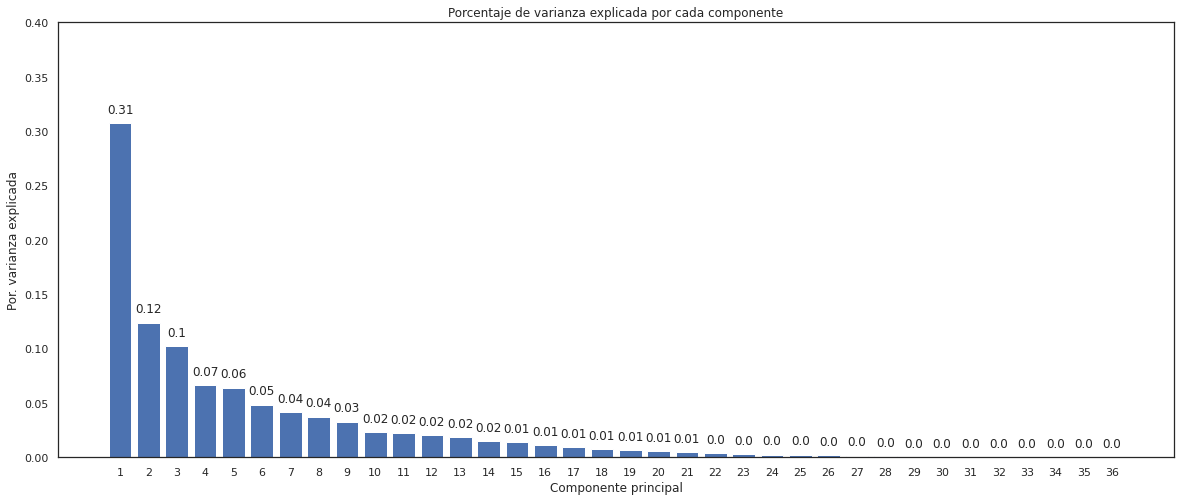

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.4)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
# Eigenvalues
np.set_printoptions(suppress=True)
print(modelo_pca.explained_variance_.round(2))

[11.14  4.49  3.69  2.4   2.32  1.75  1.5   1.36  1.19  0.84  0.81  0.73
  0.68  0.54  0.51  0.39  0.34  0.27  0.25  0.21  0.18  0.13  0.11  0.09
  0.09  0.06  0.06  0.03  0.01  0.01  0.01  0.    0.    0.    0.    0.  ]


In [ ]:
modelo_pca.explained_variance_ratio_

array([0.30758057, 0.12398191, 0.10196757, 0.06632862, 0.06412005,
       0.04838138, 0.04132437, 0.03749723, 0.03280767, 0.02330582,
       0.02243936, 0.02012845, 0.01888144, 0.01501527, 0.01419186,
       0.01088812, 0.0093711 , 0.00758983, 0.00688671, 0.00567991,
       0.00508341, 0.00356128, 0.00291569, 0.00257444, 0.00245669,
       0.0016747 , 0.0015623 , 0.00096513, 0.0003762 , 0.00023612,
       0.00020007, 0.00002564, 0.00000105, 0.00000004, 0.        ,
       0.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.30758057 0.43156248 0.53353004 0.59985867 0.66397871 0.7123601
 0.75368447 0.7911817  0.82398938 0.8472952  0.86973456 0.889863
 0.90874444 0.92375971 0.93795156 0.94883968 0.95821079 0.96580062
 0.97268732 0.97836724 0.98345065 0.98701193 0.98992762 0.99250205
 0.99495875 0.99663345 0.99819575 0.99916088 0.99953708 0.9997732
 0.99997327 0.99999891 0.99999996 1.         1.         1.        ]


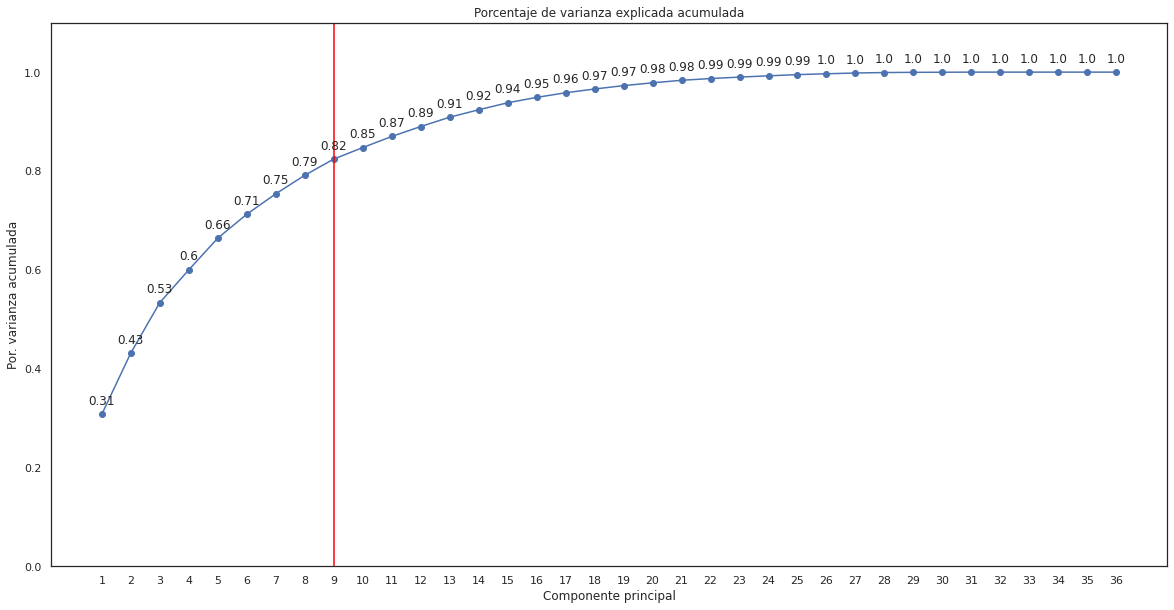

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.axvline(x=9, c="red")

In [ ]:
# Explica la variabilidad 
# Vemos la importancia de cada componente reflejada por la magnitud correspondiente de los valores en los lo eigenvectors 
explained_variance = modelo_pca.explained_variance_ratio_.round(2)
print("Variacion: ", list(zip(range(len(numericas)),explained_variance)))
cum_var_exp = np.cumsum(explained_variance).round(2) 
print("Variacion acumulada: ", list(zip(range(len(numericas)),cum_var_exp)))

Variacion:  [(0, 0.31), (1, 0.12), (2, 0.1), (3, 0.07), (4, 0.06), (5, 0.05), (6, 0.04), (7, 0.04), (8, 0.03), (9, 0.02), (10, 0.02), (11, 0.02), (12, 0.02), (13, 0.02), (14, 0.01), (15, 0.01), (16, 0.01), (17, 0.01), (18, 0.01), (19, 0.01), (20, 0.01), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.0), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.0), (32, 0.0), (33, 0.0), (34, 0.0), (35, 0.0)]
Variacion acumulada:  [(0, 0.31), (1, 0.43), (2, 0.53), (3, 0.6), (4, 0.66), (5, 0.71), (6, 0.75), (7, 0.79), (8, 0.82), (9, 0.84), (10, 0.86), (11, 0.88), (12, 0.9), (13, 0.92), (14, 0.93), (15, 0.94), (16, 0.95), (17, 0.96), (18, 0.97), (19, 0.98), (20, 0.99), (21, 0.99), (22, 0.99), (23, 0.99), (24, 0.99), (25, 0.99), (26, 0.99), (27, 0.99), (28, 0.99), (29, 0.99), (30, 0.99), (31, 0.99), (32, 0.99), (33, 0.99), (34, 0.99), (35, 0.99)]


In [ ]:
!pip install adjustText
from adjustText import adjust_text

def dim_reduction(x):
    dim_reduce = PCA(n_components=2) #dim reduction
    dim_reduce_fit = dim_reduce.fit_transform(x) 
    return dim_reduce, dim_reduce_fit

def biplot(dim_reduce,coeff,labels=None,color="blue",alpha=0.8):
    fig, ax = plt.subplots(figsize=(8,8))
    xs = dim_reduce[:,0]
    ys = dim_reduce[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #scalex = scaley = 1
    cax = ax.scatter(xs*scalex,ys*scaley,c = color, cmap=plt.get_cmap('magma'),alpha=0.35)
    arrow_scale = 1.0
    annotations = []
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0]*arrow_scale, coeff[i,1]*arrow_scale,color = 'red',linestyle="-",alpha=0.5)
        annotations.append(ax.text(coeff[i,0]*arrow_scale, 
                                   coeff[i,1]*arrow_scale, 
                                   labels[i], 
                                   color = 'black', ha = 'left', va = 'top',fontsize=15))
    adjust_text(annotations)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    return fig,cax




  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=c86a389d3c17ec79f6f4ad5273584185f377ccf623832a789b3490b23b67375b
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


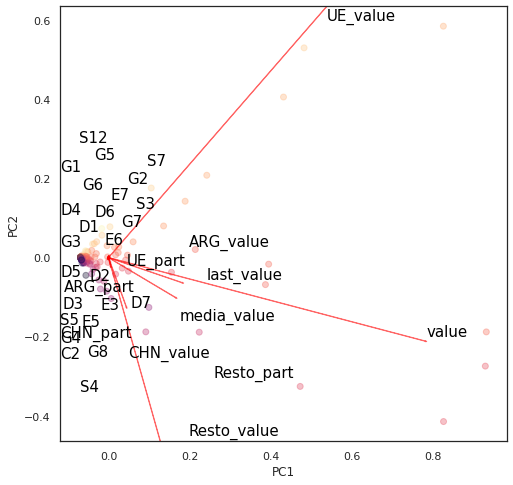

In [ ]:
dim_reduce, dim_reduce_fit = dim_reduction(X)

fig,cax = biplot(dim_reduce_fit, np.transpose(dim_reduce.components_[0:2, :]), labels=X.columns.values, color=(X.UE_part * 100).round())
# cbar = fig.colorbar(cax, ticks=[0,1,2,3], orientation='horizontal')
# cbar.ax.set_xticklabels(['Foward','Midfield','Defender',"Goalkeeper"])  # horizontal colorbar
# cbar.set_label("Analisis de componentes")
#plt.savefig("fifa_by_position.png")
plt.show()

In [ ]:
# Ahora pasamos a buscar las features mas importantes dentro de los componentes
# pca.components_ has shape [n_components, n_features]
print(modelo_pca.components_.shape)
print(abs(modelo_pca.components_)[0].round(3))
print(np.argmax(modelo_pca.components_[0]))
# el argsort ordena de menor a mayor, lo que vemos es que las variables 12, 15 y 17 son las mas importantes para
# el component pca1
np.argsort(modelo_pca.components_[0])

(36, 36)
[0.196 0.192 0.191 0.041 0.198 0.149 0.175 0.005 0.163 0.163 0.104 0.177
 0.235 0.04  0.231 0.015 0.015 0.022 0.222 0.04  0.033 0.006 0.231 0.233
 0.224 0.204 0.238 0.214 0.211 0.127 0.018 0.135 0.235 0.209 0.123 0.202]
26


array([12, 14, 22, 24, 25, 11,  9, 29, 34, 10, 19, 16,  7, 21, 15, 30, 17,
       20, 13,  3, 31,  5,  8,  6,  2,  1,  0,  4, 35, 33, 28, 27, 18, 23,
       32, 26])

In [ ]:
def features_from_pca(pca_, component, cols, top_n=5):
  # Las features mas importantes
  # top_n 
  vars = []
  # for x in  np.argsort(pca_.components_[component])[(top_n * -1):]:
  for x in  np.argsort(pca_.components_[component])[::-1][:top_n]:
    vars.append((cols[x], pca_.components_[component][x].round(2)))
  return vars
 
for x in range(0, 9):
  print("============================================================================")
  print("PC", x+1)
  print(features_from_pca(modelo_pca, x, numericas, 5))
  

PC 1
[('S7', 0.24), ('G5', 0.24), ('S3', 0.23), ('E3', 0.22), ('S12', 0.21)]
PC 2
[('Resto_value', 0.36), ('media_value', 0.36), ('last_value', 0.36), ('value', 0.35), ('UE_value', 0.33)]
PC 3
[('D6', 0.38), ('D1', 0.28), ('G6', 0.19), ('Resto_part', 0.15), ('E3', 0.14)]
PC 4
[('G4', 0.34), ('S4', 0.3), ('D3', 0.26), ('D5', 0.26), ('G1', 0.25)]
PC 5
[('E7', 0.31), ('Resto_part', 0.3), ('D5', 0.24), ('G6', 0.22), ('D3', 0.17)]
PC 6
[('E7', 0.31), ('G7', 0.26), ('G2', 0.26), ('UE_part', 0.2), ('S5', 0.15)]
PC 7
[('ARG_part', 0.4), ('CHN_part', 0.29), ('ARG_value', 0.29), ('Resto_part', 0.29), ('G7', 0.22)]
PC 8
[('ARG_value', 0.48), ('ARG_part', 0.46), ('UE_part', 0.31), ('C2', 0.17), ('E7', 0.16)]
PC 9
[('G3', 0.62), ('CHN_value', 0.27), ('CHN_part', 0.24), ('ARG_part', 0.19), ('UE_part', 0.18)]


--------------------------------------------------------------------------------
# **Cluster Kmeans**
--------------------------------------------------------------------------------

In [ ]:
sns.set()  # for plot styling
n_com = 9
RANDOM_STATE = 39
pca = PCA(n_components=n_com, random_state=RANDOM_STATE)
X_scaled = StandardScaler().fit_transform(X)
X_pca = pca.fit_transform(X_scaled) 

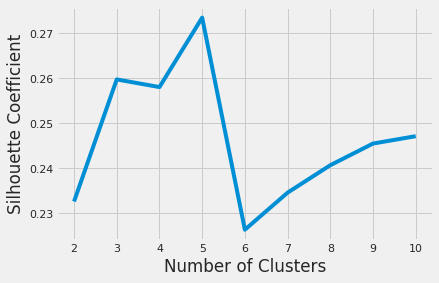

In [ ]:
# Revisar que metrica corresponderia y 
# como evaluarlo numericamente a parte del grafico
# para saber la cantidad optima de clusters
from sklearn.metrics import silhouette_score


silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,  max_iter=300, random_state=RANDOM_STATE)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_, random_state=RANDOM_STATE)
    silhouette_coefficients.append(score)
    

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

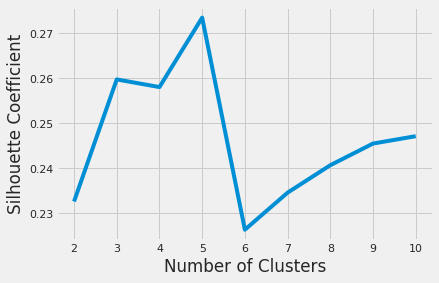

In [ ]:
# Revisar que metrica corresponderia y 
# como evaluarlo numericamente a parte del grafico
# para saber la cantidad optima de clusters
from sklearn.metrics import silhouette_score


silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,  max_iter=300, random_state=RANDOM_STATE)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_, random_state=RANDOM_STATE)
    silhouette_coefficients.append(score)
    

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Interpretación coeficiente de Silhouette:**
Utilizando el método del codo, el número óptimo de clusters a utilizar será 6. En este valor el coeficiente hace un quiebre. 
Al utilizar más de 6 clusters no se presentan mejoras en el coeficiente, esto puede ser debido a que no hay cambios significativos en los componentes que lo conforman (cohesión y separación)). 
La elección del número de clusters se acompaña con el análisis visual de los resultados atendiendo a la información que se quiere obtener y lo que representa el conjunto de datos.


-------------------------------------------------------------------------------
# Análisis de los clusters
-------------------------------------------------------------------------------
A partir de este momento, se analizan la composición de los cluster y sus particularidades, para determinar qué países podrían ser compradores potenciales de productos argentinos.

## Model training

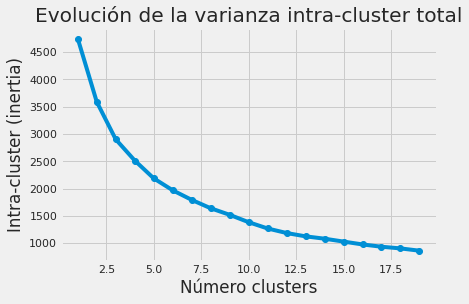

In [ ]:
range_n_clusters = range(1, 20)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = RANDOM_STATE
                    )
    modelo_kmeans.fit(X_pca)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

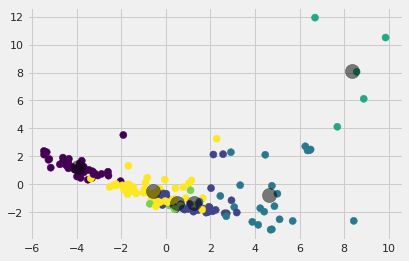

In [ ]:
N_CLUSTERS = 6 
km = KMeans(n_clusters=N_CLUSTERS, max_iter=300, random_state=RANDOM_STATE)
km.fit(X_pca)
y_means = km.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:,1], c=y_means, s=50, cmap="viridis")

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
# Como hubo varias filtraciones, uso el index del X donde se entreno KMeans, para ver las clasificaciones
# con sus valores originales
df3 = df.iloc[X.index].copy()

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
data=[]
#bool_crack=df["Overall"] > 88
#bool_no_crack=df["Overall"]<88

#Eligo dos números entre 0 y  de n_skills-1
# skill_1=attribute_names[27]
# skill_2=attribute_names[9]

layout5 = go.Layout(title='Kmeans Clustering',
                     xaxis=go.XAxis(showgrid=True,
                                     zeroline=False,
                                     showticklabels=False),
                     yaxis=go.YAxis(showgrid=True,
                                     zeroline=False,
                                     showticklabels=False),
                     hovermode='closest'
)



kmean_clusters = go.Scatter(x=X_pca[:, 0], y=X_pca[:,1],
                           mode='markers',
                            text=df3.loc[:,'pais_x'],
                           marker=dict(
                               size=df3.media_value,
                               #sizeref=df3.G5.max()/3000,
                                # sizeref=df3.last_value.max()/5000,
                                sizeref=df3.media_value.max()/5000,
                                sizemode='area',
                                # color = 'blue', #set color equal to a variable
                                color = km.labels_,
                                # colorscale='Portland',
                                showscale=False)
                           )



centroids = go.Scatter(x=km.cluster_centers_[:, 0],
                     y=km.cluster_centers_[:, 1],
                     name='',
                     mode='markers',
                     marker=dict(symbol='x',
                                 size=8,
                                color="black"
                     ),
                     showlegend=False
)

argentina = go.Scatter(x=[X_pca[:, 0][6]],
                     y=[X_pca[:, 1][6]],
                     name='argentina',
                     mode='markers',
                     marker=dict(symbol='star-diamond',
                                 size=10,
                                color="blue"
                     ),
                     showlegend=False
)

#paraguay = go.Scatter(x=[X_pca[:, 0][122]],
#                     y=[X_pca[:, 1][122]],
#                     name='paraguay',
#                     mode='markers',
#                     marker=dict(symbol='hexagon',
#                                 size=10,
#                                color="green"
#                     ),
#                     showlegend=False
#)
data = go.Data([kmean_clusters, centroids, argentina])#, paraguay])

fig = go.Figure(data=data, layout=layout5)
fig.show(renderer="colab")

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [ ]:
df3["cluster"] = y_means

Debido a la posibilidad de variacion en la numeracion de clusters se decidió crear un alias para cada region, ordeandas al igual en el grafico anterior de 1 a 6 (de derecha a izquierda) en donde en el cluster 1 se encuentran los paises con menor importaciones y en el 6 con mayores.   


In [ ]:
zn_value = int(df3.cluster[df3.pais_x == "China"].values)
print("6 China: ", zn_value)
aut_value = int(df3.cluster[df3.pais_x == "Austria"].values)
print("5 Austria: ", aut_value)
mx_value = int(df3.cluster[df3.pais_x == "México"].values)
print("4 Mexico: ", mx_value)
arg_value = int(df3.cluster[df3.pais_x == "Argentina"].values)
print("3 Argentina: ", arg_value)
qat_value = int(df3.cluster[df3.pais_x == "Qatar"].values)
print("2 Qatar: ", qat_value)
pak_value = int(df3.cluster[df3.pais_x == "Pakistán"].values)
print("1 Pakistan: ", pak_value)

6 China:  3
5 Austria:  2
4 Mexico:  1
3 Argentina:  5
2 Qatar:  4
1 Pakistan:  0


In [ ]:
cluster_mapping = {
    zn_value:'6', aut_value:'5', mx_value:'4', arg_value: '3', qat_value: '2', pak_value: '1'
    }
cluster_alias = [cluster_mapping[i] for i in  y_means]
df3["cluster_alias"] = cluster_alias

## Composite Index

1. la cuenta fue tomar los eigenvalues y dividirlo por la suma total de los mismos 
2. aplicar un minmax scaler a cada PCA para quedarse solo con valores positivos
3. multiplicarlo por el ratio obtenido en el paso 1

En base a: 
https://gist.github.com/audhiaprilliant/9ad4e316c6d74a1c93a37836087fe3de#file-factor_analysis_composite_index-ipynb

https://www.oecd.org/sdd/42495745.pdf 



In [ ]:
ratio_variance = pca.explained_variance_ / pca.explained_variance_.sum()
ratio_variance

array([0.37328221, 0.15046542, 0.12374864, 0.08049694, 0.07781659,
       0.05871603, 0.05015158, 0.04550694, 0.03981565])

In [ ]:
# Ratio of variance df
df_ratio_var = pd.DataFrame(data = ratio_variance.reshape((1, n_com)), index = ['Ratio Variance'], columns=range(0, n_com))
df_ratio_var

,0,1,2,3,4,5,6,7,8
Ratio Variance,0.4,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0.0


In [ ]:
# standarize componentes:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_pca_scaled = pd.DataFrame(data=scaler.fit_transform(X_pca))
X_pca_scaled

,0,1,2,3,4,5,6,7,8
0,0.4,0.1,0.3,0.5,0.6,0.5,0.3,0.4,0.2
1,0.0,0.4,0.3,0.5,0.3,0.5,0.7,0.3,0.1
2,0.1,0.3,0.5,0.7,0.4,0.6,0.3,0.5,0.3
3,0.4,0.1,0.2,0.4,0.4,0.6,0.4,0.5,0.2
4,0.7,0.0,0.3,0.8,0.2,0.5,0.5,0.4,0.1
...,...,...,...,...,...,...,...,...,...
155,0.3,0.2,0.5,0.3,0.7,0.2,0.5,0.3,0.2
156,0.0,0.3,0.4,0.6,0.5,1.0,0.7,0.3,0.1
157,0.3,0.2,0.4,0.6,0.7,0.6,0.3,0.5,0.2
158,0.1,0.3,0.5,0.6,0.5,0.3,0.4,0.4,0.3


In [ ]:
# Solo considera al primer PCA y al segundo
selected_index = {}
for i in [0, 3]:
  key = X_pca_scaled.columns[i]
  value = X_pca_scaled.iloc[:,i].values * df_ratio_var.iloc[:,i].values
  selected_index.update({key:value})

In [ ]:
df3.columns

Index(['iso_pais', 'pais_x', 'continente', 'value', 'media_value',
       'last_value', 'ARG_value', 'UE_value', 'CHN_value', 'Resto_value',
       'ARG_part', 'UE_part', 'CHN_part', 'Resto_part', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'E3', 'E5', 'E6', 'E7', 'C2', 'S3', 'S4', 'S5', 'S7',
       'S12', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'pais_y',
       'cod_ISO', 'cluster', 'cluster_alias'],
      dtype='object')

In [ ]:
df_selected_index = pd.DataFrame(selected_index)
df_selected_index["composite_ix"] = df_selected_index.sum(axis=1).values
df_selected_index["ranking"] = df_selected_index.composite_ix.rank(ascending=False)
df_selected_index["iso_pais"] = df3["iso_pais"]
df_selected_index["pais_x"] = df3["pais_x"]
df_selected_index["cluster"] = df3["cluster"]
df_selected_index["cluster_alias"] = df3["cluster_alias"]
df_selected_index["ARG_value"] = df3["ARG_value"]
df_selected_index["UE_value"] = df3["UE_value"]
df_selected_index["continente"] = df3["continente"]
df_selected_index.sort_values(by='ranking')[["ranking", "iso_pais","pais_x", "cluster_alias", "composite_ix"]]

,ranking,iso_pais,pais_x,cluster_alias,composite_ix
75,1.0,JPN,Japón,6,0.4
30,2.0,CHE,Suiza,5,0.4
111,3.0,NLD,Países Bajos,6,0.4
51,4.0,FRA,Francia,6,0.4
41,5.0,DEU,Alemania,6,0.4
...,...,...,...,...,...
108,156.0,NER,Níger,1,0.1
34,157.0,CMR,Camerún,1,0.1
109,158.0,NGA,Nigeria,1,0.1
156,159.0,WSM,Samoa,3,0.1


In [ ]:
# considera a todos
dict_index = {}
for i in range(n_com):
    key = X_pca_scaled.columns[i]
    value = X_pca_scaled.iloc[:,i].values * df_ratio_var.iloc[:,i].values
    dict_index.update({key:value})


In [ ]:
df_index = pd.DataFrame(dict_index)
df_index["composite_ix"] = df_index.sum(axis=1).values
df_index["ranking"] = df_index.composite_ix.rank(ascending=False)
df_index["iso_pais"] = df3["iso_pais"]
df_index["pais_x"] = df3["pais_x"]
df_index["cluster"] = df3["cluster"]
df_index["cluster_alias"] = df3["cluster_alias"]
df_index["ARG_value"] = df3["ARG_value"]
df_index["UE_value"] = df3["UE_value"]
df_index["continente"] = df3["continente"]
df_index.sort_values(by='ranking')[["ranking", "iso_pais","pais_x", "cluster_alias", "composite_ix"]]

,ranking,iso_pais,pais_x,cluster_alias,composite_ix
75,1.0,JPN,Japón,6,0.7
51,2.0,FRA,Francia,6,0.7
111,3.0,NLD,Países Bajos,6,0.7
41,4.0,DEU,Alemania,6,0.6
32,5.0,CHN,China,6,0.6
...,...,...,...,...,...
99,156.0,MMR,Myanmar,1,0.2
33,157.0,CIV,Côte d'Ivoire,1,0.2
16,158.0,BGD,Bangladesh,1,0.2
48,159.0,ETH,Etiopía,1,0.2


In [ ]:
df_index[df_index.cluster==5].sort_values(by='ranking')[["ranking", "iso_pais", "pais_x", "cluster", "composite_ix"]]

,ranking,iso_pais,pais_x,cluster,composite_ix
24,11.0,BRA,Brasil,5.0,0.5
152,31.0,URY,Uruguay,5.0,0.4
120,32.0,PLW,Palau,5.0,0.4
36,34.0,COL,Colombia,5.0,0.4
31,37.0,CHL,Chile,5.0,0.4
38,39.0,CRI,Costa Rica,5.0,0.4
6,45.0,ARG,Argentina,5.0,0.4
107,55.0,NAM,Namibia,5.0,0.4
26,56.0,BRN,Brunei,5.0,0.4
148,57.0,TUR,Turquía,5.0,0.4


In [ ]:
df_selected_index[df_selected_index.cluster==5].sort_values(by='ranking')[["ranking", "iso_pais", "pais_x", "cluster", "composite_ix"]]

,ranking,iso_pais,pais_x,cluster,composite_ix
24,33.0,BRA,Brasil,5.0,0.2
38,40.0,CRI,Costa Rica,5.0,0.2
31,43.0,CHL,Chile,5.0,0.2
152,44.0,URY,Uruguay,5.0,0.2
6,55.0,ARG,Argentina,5.0,0.2
36,57.0,COL,Colombia,5.0,0.2
120,59.0,PLW,Palau,5.0,0.2
148,60.0,TUR,Turquía,5.0,0.2
117,64.0,PAN,Panamá,5.0,0.2
134,65.0,SLV,El Salvador,5.0,0.2


## Analisis general

In [ ]:
# Analizamos la proporcion de paises por cluster en donde el cluster donde esta Argentina es el mas grande.
df3.groupby("cluster_alias").size()/len(df3)*100

cluster_alias
1   26.2
2    3.8
3   30.6
4   21.9
5   14.4
6    3.1
dtype: float64

In [ ]:
# Cantidad de paises en cada cluster, unique nos indica la cantidad de continentes por grupo, 
# y top nos dice cual es el contienente predominante en el cluster
# se puede observar una cierta progresion en el continente predominante en cada cluster y la riqueza de los paises:
df3.groupby('cluster_alias')[["continente"]].describe()

continente                     
                   count unique      top freq
cluster_alias                                
1                     42      2   África   30
2                      6      1     Asia    6
3                     49      5  América   20
4                     35      4   Europa   22
5                     23      4   Europa   14
6                      5      2   Europa    3

## Medidas de las variables mas importantes por cluster


**Evaluamos las variables que aparecen en el primer componente:**
- G5 = Gasto Corriente en Salud per cápita
- S7 = Doctores cada 1.000 habitantes
- S3 = Causa de muerte, por enfermedad no transmisibles (% del total)
- S12 = Gastos de bolsillo en Salud per cápita en PPP 
- E3 = PBI per cápita (usd actuales)


In [ ]:
cols_pca = ["pais_x", "G5", "S7", "S3", "S12" , "E3", "media_value", "ARG_value", "ARG_part","UE_part", "CHN_part", "Resto_part"]

In [ ]:
df3.groupby('cluster_alias')[cols_pca].mean()#.sort_values("ARG_value", ascending=False)

,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
cluster_alias,,,,,,,,,,,
1,63.4,3.1,42.8,93.6,1386.5,93504400.0,111231.7,0.0,46.0,20.3,33.6
2,1270.1,17.1,74.4,381.7,32140.8,442168806.3,269315.7,0.0,65.7,6.3,28.0
3,412.3,12.7,73.4,191.8,6856.8,285331042.4,2969970.2,0.3,49.9,11.4,38.5
4,778.2,29.6,88.2,473.5,12700.9,360009145.1,651115.9,0.0,72.0,8.5,19.5
5,4349.6,34.8,86.3,907.4,52624.8,1769487063.1,573935.0,0.0,73.1,6.9,20.0
6,3504.4,30.3,88.0,490.9,35777.9,10068884187.8,2998106.2,0.0,66.5,5.1,28.4


Se puede observar en esta tabla como el cluster 3 y 1 son los que cuentan con menor compra de insumos desde la Unión Europa y USA. 

In [ ]:
df3.groupby('cluster_alias')[cols_pca].std()

,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
cluster_alias,,,,,,,,,,,
1,36.8,3.1,14.6,92.0,1010.4,168441535.1,360237.9,0.1,19.3,10.2,16.6
2,451.2,10.3,4.9,180.6,17512.3,463033795.7,366382.4,0.0,6.9,2.4,8.6
3,330.5,9.4,12.1,140.0,5172.8,522011225.5,9946871.5,0.8,20.9,7.8,22.2
4,482.6,9.8,5.9,206.7,7466.2,685247732.5,1951881.2,0.0,14.7,6.4,11.5
5,1784.9,7.6,6.7,433.8,19669.9,1834318096.9,712620.6,0.0,15.1,8.2,11.1
6,1769.7,9.5,3.4,198.9,15661.4,2153758894.3,4152896.0,0.0,8.9,4.0,7.9


In [ ]:
# Decidimos evaluar en cada cluster las variables que se muestran 
# mas importantes en el analisis previo realizado mediante la tecnica de pca.
# Observamos al cluster 1 con los valores medios mas bajos en sus indicadores. 
# A su vez, vemos que el cluster 1 y 2 son los grupos que menos importan insumos medicos de USA y EUROPA. 

## Comparación de clusters 

Y Medias globales de referencia

In [ ]:
# Para tener referencia para cada cluster
print("Valor de referencia")
print("_________________________________________________________________________")
df3[cols_pca].describe()

Valor de referencia
_________________________________________________________________________


,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0
mean,1095.5,17.8,70.9,347.0,15130.3,776277263.6,1267476.6,0.1,58.1,12.1,29.7
std,1664.9,14.3,20.8,345.4,19737.9,1968996703.0,5723341.5,0.4,21.2,9.6,18.2
min,21.0,0.0,26.0,0.2,292.0,345071.3,0.0,0.0,1.6,0.1,0.9
25%,108.5,3.8,59.5,89.8,2199.4,20150441.2,0.0,0.0,45.3,4.8,17.4
50%,376.6,15.6,77.0,247.2,6026.2,90547504.1,42283.5,0.0,60.8,9.9,26.5
75%,1174.1,30.0,88.4,520.7,19214.2,468953776.8,585328.5,0.0,72.0,15.8,38.2
max,9818.0,51.4,95.2,2165.0,104498.7,13113601112.0,68249339.0,4.8,96.9,46.7,97.4


In [ ]:
medias_global = df3[cols_pca].mean()
medias_global

G5                 1095.5
S7                   17.8
S3                   70.9
S12                 347.0
E3                15130.3
media_value   776277263.6
ARG_value       1267476.6
ARG_part              0.1
UE_part              58.1
CHN_part             12.1
Resto_part           29.7
dtype: float64

### Gasto Corriente en Salud per cápita

Text(0.5, 1.0, 'Cluster 6')

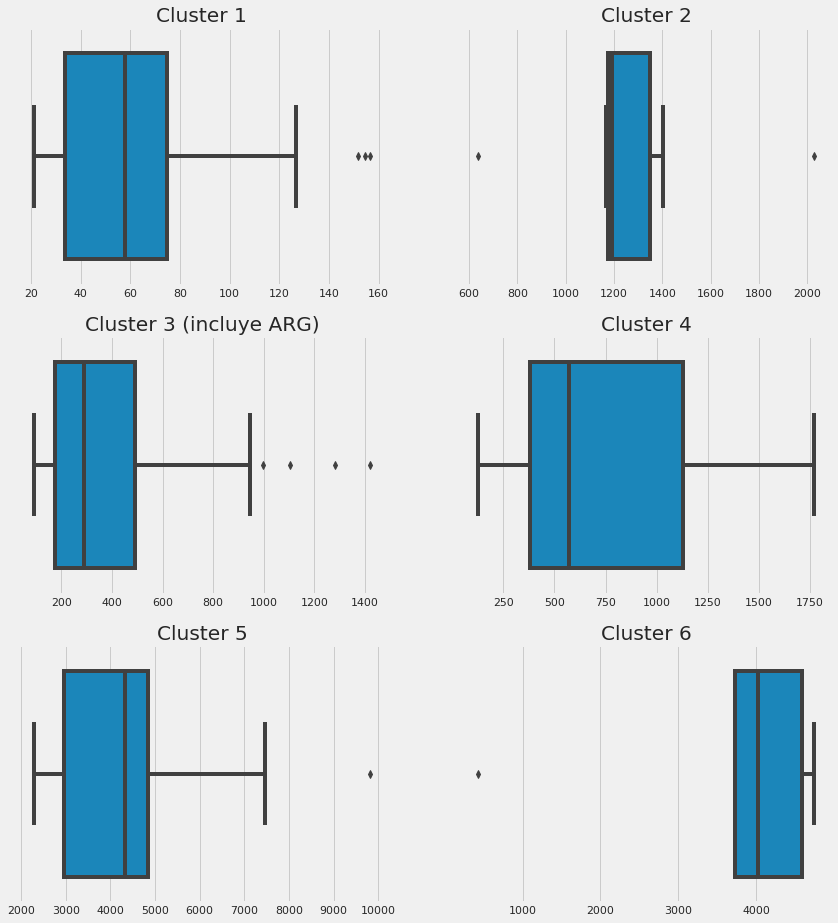

In [ ]:
# G5, S7, E3 
# G5 = Gasto Corriente en Salud per cápita

df_cluster = df3[df3.cluster==0]

fig, ax = plt.subplots(3, 2, figsize=(13,15))

sns.boxplot(data=df3[df3.cluster_alias=="1"], x="G5", ax=ax[0][0])
ax[0][0].set(xlabel='', ylabel='')
ax[0][0].set_title("Cluster 1")

sns.boxplot(data=df3[df3.cluster_alias=="2"], x="G5", ax=ax[0][1])
ax[0][1].set(xlabel='', ylabel='')
ax[0][1].set_title("Cluster 2")

sns.boxplot(data=df3[df3.cluster_alias=="3"], x="G5", ax=ax[1][0])
ax[1][0].set(xlabel='', ylabel='')
ax[1][0].set_title("Cluster 3 (incluye ARG)")

sns.boxplot(data=df3[df3.cluster_alias=="4"], x="G5", ax=ax[1][1])
ax[1][1].set(xlabel='', ylabel='')
ax[1][1].set_title("Cluster 4")

sns.boxplot(data=df3[df3.cluster_alias=="5"], x="G5", ax=ax[2][0])
ax[2][0].set(xlabel='', ylabel='')
ax[2][0].set_title("Cluster 5")

sns.boxplot(data=df3[df3.cluster_alias=="6"], x="G5", ax=ax[2][1])
ax[2][1].set(xlabel='', ylabel='')
ax[2][1].set_title("Cluster 6")

###  PBI per cápita (usd actuales)

Text(0.5, 1.0, 'Cluster 6')

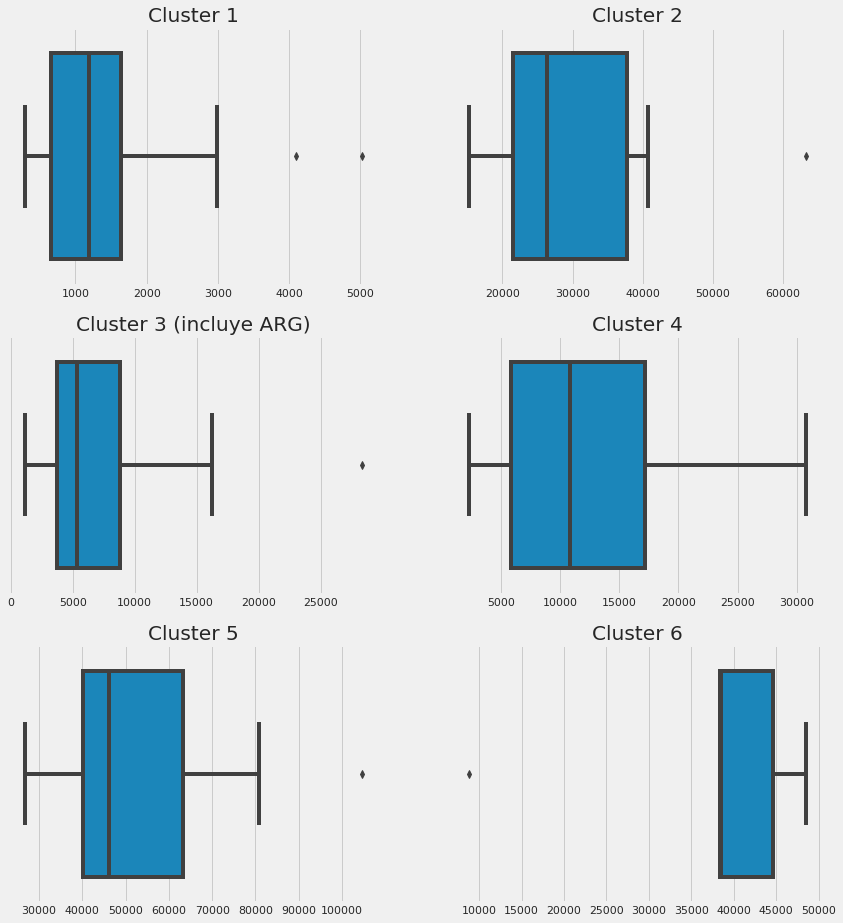

In [ ]:
# G5, S7, E3 
# E3 = PBI per cápita (usd actuales)
df_cluster = df3[df3.cluster==0]

fig, ax = plt.subplots(3, 2, figsize=(13,15))

sns.boxplot(data=df3[df3.cluster_alias=="1"], x="E3", ax=ax[0][0])
ax[0][0].set(xlabel='', ylabel='')
ax[0][0].set_title("Cluster 1")

sns.boxplot(data=df3[df3.cluster_alias=="2"], x="E3", ax=ax[0][1])
ax[0][1].set(xlabel='', ylabel='')
ax[0][1].set_title("Cluster 2")

sns.boxplot(data=df3[df3.cluster_alias=="3"], x="E3", ax=ax[1][0])
ax[1][0].set(xlabel='', ylabel='')
ax[1][0].set_title("Cluster 3 (incluye ARG)")

sns.boxplot(data=df3[df3.cluster_alias=="4"], x="E3", ax=ax[1][1])
ax[1][1].set(xlabel='', ylabel='')
ax[1][1].set_title("Cluster 4")

sns.boxplot(data=df3[df3.cluster_alias=="5"], x="E3", ax=ax[2][0])
ax[2][0].set(xlabel='', ylabel='')
ax[2][0].set_title("Cluster 5")

sns.boxplot(data=df3[df3.cluster_alias=="6"], x="E3", ax=ax[2][1])
ax[2][1].set(xlabel='', ylabel='')
ax[2][1].set_title("Cluster 6")

_____________________________________________________________________________
## **Cluster 1F**

In [ ]:
print(f'Los paises que componen el cluster 1 son: {df3[df3.cluster_alias == "1"].pais_x.values} ' )
print("=====================================================================================================")
df3[df3.cluster_alias == "1"][cols_pca].describe()

Los paises que componen el cluster 1 son: ['Afganistán' 'Angola' 'Burundi' 'Benin' 'Burkina Faso' 'Bangladesh'
 'República Centroafricana' "Côte d'Ivoire" 'Camerún' 'Congo' 'Egipto'
 'Etiopía' 'Ghana' 'Guinea' 'Gambia' 'India' 'Iraq' 'Kenya' 'Camboya'
 'Laos' 'Madagascar' 'Malí' 'Myanmar' 'Mozambique' 'Mauritania' 'Malawi'
 'Níger' 'Nigeria' 'Nepal' 'Pakistán' 'Filipinas' 'Rwanda' 'Sudán'
 'Senegal' 'Sierra Leona' 'Togo' 'Timor Leste' 'Tanzanía' 'Uganda' 'Yemen'
 'Zambia' 'Zimbabwe'] 


,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
mean,63.4,3.1,42.8,93.6,1386.5,93504400.0,111231.7,0.0,46.0,20.3,33.6
std,36.8,3.1,14.6,92.0,1010.4,168441535.1,360237.9,0.1,19.3,10.2,16.6
min,21.0,0.2,26.0,4.4,292.0,798768.5,0.0,0.0,9.4,3.5,5.2
25%,33.6,0.8,32.8,35.0,658.8,9563373.9,0.0,0.0,33.5,13.7,20.4
50%,57.8,1.7,37.2,64.2,1196.7,31243804.4,115.0,0.0,46.6,17.9,29.8
75%,74.6,4.9,54.1,116.2,1639.2,107649221.6,15403.2,0.0,61.8,26.0,44.2
max,156.6,12.8,84.1,425.1,5018.0,953423798.0,2175255.0,0.4,91.3,46.7,80.2


In [ ]:
print(len(df3[(df3.cluster_alias == "1") & (df3.ARG_part != 0)][cols_pca].sort_values(by="ARG_part", ascending=False)))

21


In [ ]:
print(f' El Cluster Nº 1 representa el {round(len(df3[df3.cluster_alias == "1"])/len(df3)*100,1)}% de los países analizados') 
print(f' Y juntosa cumulan el {round(df3.last_value[df3.cluster_alias == "1"].sum()/df3.last_value.sum()*100,1)}% de lo comerciado en el último año')

 El Cluster Nº 1 representa el 26.2% de los países analizados
 Y juntosa cumulan el 3.4% de lo comerciado en el último año


In [ ]:
print(f' El Cluster Nº 1 compra el {round(df3.ARG_value[df3.cluster_alias == "1"].sum()/df3.ARG_value.sum()*100,1)}% de las exportaciones argentinas') 

 El Cluster Nº 1 compra el 2.3% de las exportaciones argentinas


El cluster Nº 1 está compuesto en su mayoría por países africanos y asiáticos de ingresos bajos. Con un gasto en salud bajo como así también el número de doctores cada mil habitantes.

De los 40 países que componen este cluster, aproximadamente la mitad (20) han comerciado con Argentina en el período 2013-2018. Sin embargo , los valores comerciados son mínimos. Para ejemplificar, Rwanda y Bangladesh poseen los valores más alto de % de importaciones con origen Argentino sobre su total y ambos no super el 0,5%.  

El origen principal de sus importaciones es la Unión Europea Y EE.UU (46%), sin embargo, éstas están distrubuídas: China representa el 20% y el resto del mundo un 33%.

La suma de sus importaciones representa solo el 2,3% del total comerciado en el último año. Esta cifra es baja considerando que representan el 25% de los países estudiados. 

Este cluster de países no parecieran ser destinos ideales para las exportaciones de insumos médicos ya que sus indicadores socio-económicos no lucen muy alentadores. Sin embargo, no sería correcto descartarlos en su totalidad ya que como se observa, con varios de ellos, ya se ha establecido una relación comercial. Además, la participación de las importaciones del resto del mundo (33%) estaría indicando que no poseen restricciones de aduana demasiado estrictas.

In [ ]:
# Descripción de los países del cluster con los que comerciamos. 
df3[(df3.cluster_alias == "1") & (df3.ARG_part != 0)][cols_pca].sort_values(by="ARG_part", ascending=False)

,pais_x,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
127,Rwanda,56.7,1.3,44.0,37.2,748.3,31925260.3,386780,0.4,50.5,15.2,33.9
16,Bangladesh,31.8,5.3,66.9,63.2,1516.5,132193168.0,234366,0.2,35.2,18.8,45.8
45,Egipto,156.6,7.9,84.1,306.8,2412.7,419778525.8,2175255,0.1,70.2,10.7,18.9
113,Nepal,44.4,6.5,66.2,91.0,849.0,68860619.2,192818,0.1,36.1,18.6,45.2
33,Côte d'Ivoire,75.5,2.3,37.2,68.3,1537.5,31251794.5,80524,0.1,50.1,19.3,30.5
2,Angola,108.6,2.1,27.4,65.3,4100.3,118714400.5,93356,0.0,65.3,14.5,20.1
119,Filipinas,126.9,12.8,67.3,172.8,2989.0,318240704.0,495439,0.0,41.4,14.8,43.8
15,Burkina Faso,33.4,0.6,32.7,34.7,642.0,14818986.2,12327,0.0,62.6,15.9,21.4
66,India,63.3,7.8,62.7,154.7,1979.4,953423798.0,764948,0.0,58.8,11.3,29.9
150,Uganda,46.1,0.9,32.9,56.1,606.5,49482001.6,28542,0.0,41.2,22.7,36.1


In [ ]:
# Descripción de los países del cluster con los NO que comerciamos. 
df3[(df3.cluster_alias == "1") & (df3.ARG_part == 0)][cols_pca].sort_values(by="ARG_part", ascending=False)

,pais_x,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
1,Afganistán,60.1,2.8,44.1,144.2,550.1,264020382.3,0,0.0,9.4,30.5,60.1
94,Madagascar,21.0,1.8,43.2,16.6,449.7,9482482.0,0,0.0,46.6,26.2,27.2
149,Tanzanía,31.7,0.4,32.9,25.2,958.4,77624466.2,0,0.0,40.6,14.4,45.0
144,Timor Leste,71.7,7.2,45.4,14.5,2279.3,1485745.0,0,0.0,9.8,23.8,66.3
133,Sierra Leona,106.7,0.2,33.2,98.0,499.5,8779264.8,0,0.0,35.9,37.5,26.6
129,Sudán,151.8,4.8,52.2,175.1,2898.5,51328241.0,0,0.0,32.2,25.0,42.8
108,Níger,25.7,0.5,27.0,35.8,378.1,9806049.7,0,0.0,52.5,32.4,15.1
105,Malawi,34.2,0.7,31.7,11.9,338.5,21721142.0,0,0.0,42.8,14.9,42.3
103,Mauritania,53.6,1.8,37.2,85.4,1136.8,4908072.0,0,0.0,36.8,46.7,16.5
97,Malí,42.3,1.4,30.5,54.9,827.0,11868554.5,0,0.0,53.0,21.0,26.0


[Text(0, 0.5, ''), Text(0.5, 0, '')]

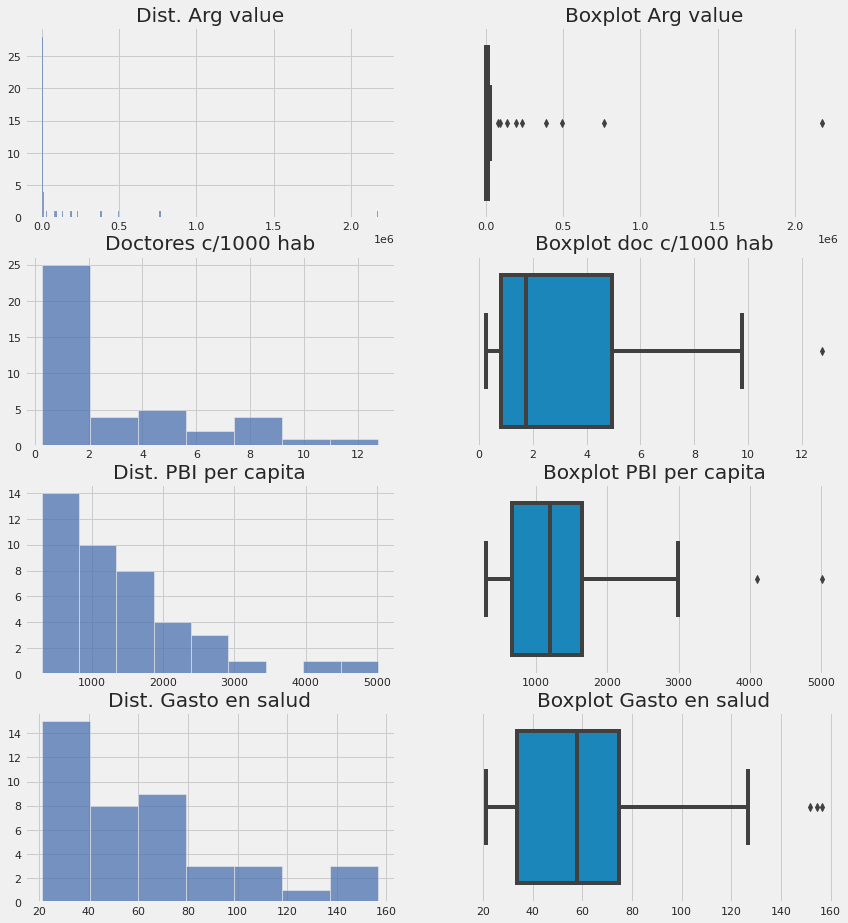

In [ ]:
df_cluster = df3[df3.cluster_alias=="1"]

fig, ax = plt.subplots(4, 2, figsize=(13,15))

# ARG_value
sns.histplot(data=df_cluster, x="ARG_value", ax=ax[0][0])
ax[0][0].set(xlabel='', ylabel='')
ax[0][0].set_title("Dist. Arg value")

sns.boxplot(data=df_cluster, x="ARG_value", ax=ax[0][1])
ax[0][1].set(xlabel='', ylabel='')
ax[0][1].set_title("Boxplot Arg value")

# S7
sns.histplot(data=df_cluster, x="S7", ax=ax[1][0])
ax[1][0].set(xlabel='', ylabel='')
ax[1][0].set_title("Doctores c/1000 hab")

sns.boxplot(data=df_cluster, x="S7", ax=ax[1][1])
ax[1][1].set_title("Boxplot doc c/1000 hab")
ax[1][1].set(xlabel='', ylabel='')


# E3
sns.histplot(data=df_cluster, x="E3", ax=ax[2][0])
ax[2][0].set(xlabel='', ylabel='')
ax[2][0].set_title("Dist. PBI per capita")

sns.boxplot(data=df_cluster, x="E3", ax=ax[2][1])
ax[2][1].set_title("Boxplot PBI per capita")
ax[2][1].set(xlabel='', ylabel='')

# G5
sns.histplot(data=df_cluster, x="G5", ax=ax[3][0])
ax[3][0].set(xlabel='', ylabel='')
ax[3][0].set_title("Dist. Gasto en salud")

sns.boxplot(data=df_cluster, x="G5", ax=ax[3][1])
ax[3][1].set_title("Boxplot Gasto en salud")
ax[3][1].set(xlabel='', ylabel='')

## Cluster 2F

In [ ]:
print(f'Los paises que componen el cluster 2 son: {df3[df3.cluster_alias == "2"].pais_x.values} ' )
print("=====================================================================================================")
df3[df3.cluster_alias == "2"][cols_pca].describe()

Los paises que componen el cluster 2 son: ['Emiratos Árabes Unidos' 'Bahrein' 'Kuwait' 'Omán' 'Qatar'
 'Arabia Saudita'] 


,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
mean,1270.1,17.1,74.4,381.7,32140.8,442168806.3,269315.7,0.0,65.7,6.3,28.0
std,451.2,10.3,4.9,180.6,17512.3,463033795.7,366382.4,0.0,6.9,2.4,8.6
min,636.5,0.0,68.9,104.1,15267.4,32008229.8,0.0,0.0,51.8,3.0,21.3
25%,1174.1,11.9,72.0,289.2,21571.8,118861233.2,532.8,0.0,67.6,5.0,24.2
50%,1192.0,21.8,72.8,429.8,26389.8,283067354.6,88159.0,0.0,68.4,6.1,25.0
75%,1350.0,23.9,75.9,458.6,37784.2,632464252.8,477535.8,0.0,68.9,7.5,26.8
max,2029.5,25.8,83.0,615.7,63249.4,1241814154.0,860924.0,0.0,69.4,9.9,45.2


In [ ]:
print(f' El Cluster Nº 2 representa el {round(len(df3[df3.cluster_alias == "2"])/len(df3)*100,1)}% de los países anailzados') 
print(f' Y juntos acumulan el {round(df3.last_value[df3.cluster_alias == "2"].sum()/df3.last_value.sum()*100,1)}% de lo comerciado en el último año')

 El Cluster Nº 2 representa el 3.8% de los países anailzados
 Y juntos acumulan el 2.1% de lo comerciado en el último año


In [ ]:
print(f' El Cluster Nº 2 compra el {round(df3.ARG_value[df3.cluster_alias == "2"].sum()/df3.ARG_value.sum()*100,1)}% de las exportaciones argentinas')

 El Cluster Nº 2 compra el 0.8% de las exportaciones argentinas


[Text(0, 0.5, ''), Text(0.5, 0, '')]

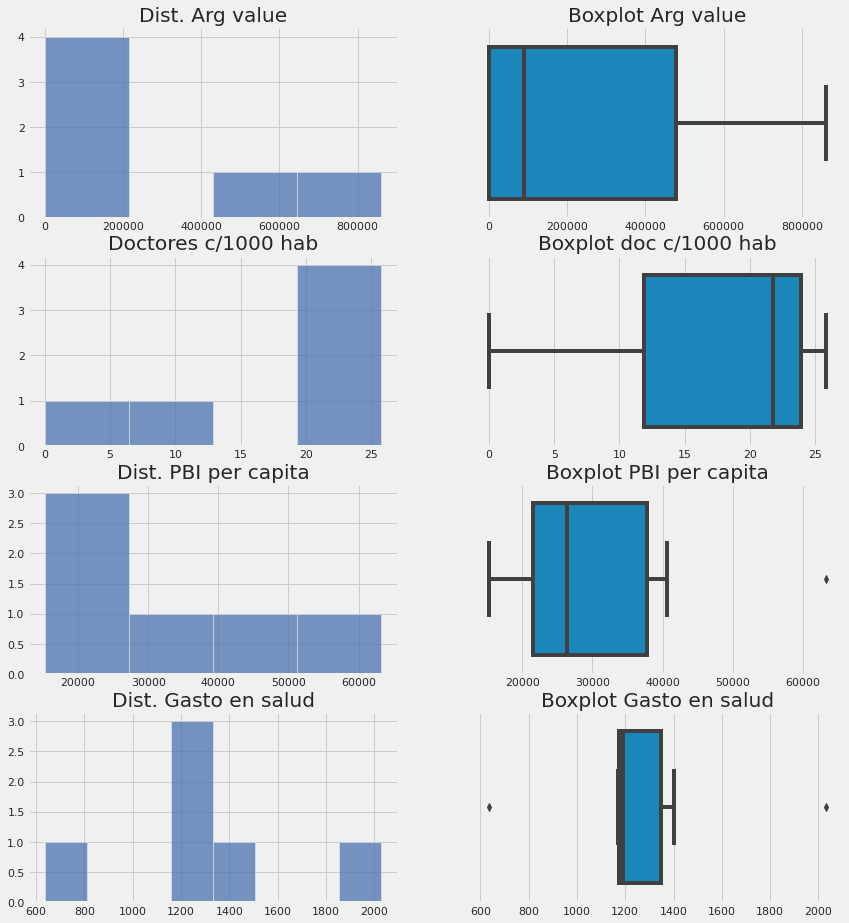

In [ ]:
df_cluster = df3[df3.cluster_alias == "2"]

fig, ax = plt.subplots(4, 2, figsize=(13,15))

# ARG_value
sns.histplot(data=df_cluster, x="ARG_value", ax=ax[0][0])
ax[0][0].set(xlabel='', ylabel='')
ax[0][0].set_title("Dist. Arg value")

sns.boxplot(data=df_cluster, x="ARG_value", ax=ax[0][1])
ax[0][1].set(xlabel='', ylabel='')
ax[0][1].set_title("Boxplot Arg value")

# S7
sns.histplot(data=df_cluster, x="S7", ax=ax[1][0])
ax[1][0].set(xlabel='', ylabel='')
ax[1][0].set_title("Doctores c/1000 hab")

sns.boxplot(data=df_cluster, x="S7", ax=ax[1][1])
ax[1][1].set_title("Boxplot doc c/1000 hab")
ax[1][1].set(xlabel='', ylabel='')


# E3
sns.histplot(data=df_cluster, x="E3", ax=ax[2][0])
ax[2][0].set(xlabel='', ylabel='')
ax[2][0].set_title("Dist. PBI per capita")

sns.boxplot(data=df_cluster, x="E3", ax=ax[2][1])
ax[2][1].set_title("Boxplot PBI per capita")
ax[2][1].set(xlabel='', ylabel='')

# G5
sns.histplot(data=df_cluster, x="G5", ax=ax[3][0])
ax[3][0].set(xlabel='', ylabel='')
ax[3][0].set_title("Dist. Gasto en salud")

sns.boxplot(data=df_cluster, x="G5", ax=ax[3][1])
ax[3][1].set_title("Boxplot Gasto en salud")
ax[3][1].set(xlabel='', ylabel='')

______________________________________________________________________________
## **Cluster 3F**

In [ ]:
print(f'Los paises que componen el cluster 3 son: {df3[df3.cluster_alias == "3"].pais_x.values} ' )
print("=====================================================================================================")
df3[df3.cluster_alias == "3"][cols_pca].describe()



Los paises que componen el cluster 3 son: ['Argentina' 'Belice' 'Bolivia' 'Brasil' 'Brunei' 'Botswana' 'Chile'
 'Colombia' 'Cabo Verde' 'Costa Rica' 'República Dominicana' 'Argelia'
 'Ecuador' 'Fiji' 'Guatemala' 'Guyana' 'Honduras' 'Indonesia' 'Irán'
 'Jordania' 'Kirguistán' 'Kiribati' 'Líbano' 'Sri Lanka' 'Lesotho'
 'Marruecos' 'Maldivas' 'Mongolia' 'Malasia' 'Namibia' 'Nicaragua'
 'Panamá' 'Perú' 'Palau' 'Paraguay' 'Islas Salomón' 'El Salvador'
 'Santo Tomé y Príncipe' 'Suriname' 'Seychelles' 'Tailandia' 'Tonga'
 'Túnez' 'Turquía' 'Uruguay' 'San Vicente y Las Granadinas' 'Viet Nam'
 'Samoa' 'Sudáfrica'] 


,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0,49.0
mean,412.3,12.7,73.4,191.8,6856.8,285331042.4,2969970.2,0.3,49.9,11.4,38.5
std,330.5,9.4,12.1,140.0,5172.8,522011225.5,9946871.5,0.8,20.9,7.8,22.2
min,90.9,0.7,32.3,0.2,1154.4,345071.3,0.0,0.0,1.6,1.0,0.9
25%,174.9,7.3,69.2,83.6,3717.5,12528636.4,0.0,0.0,39.6,5.9,25.4
50%,291.6,11.3,74.8,156.0,5317.4,50823849.0,241663.0,0.0,52.2,10.5,30.2
75%,491.8,16.1,81.9,264.3,8808.6,323660759.8,1279496.0,0.2,62.3,14.8,46.2
max,1420.2,50.5,90.6,613.6,28290.6,3055819483.0,68249339.0,4.8,90.4,37.8,97.4


In [ ]:
print(f' El Cluster Nº 3 representa el {round(len(df3[df3.cluster_alias == "3"])/len(df3)*100,1)}% de los países analizados') 
print(f' Y juntos acumulan el {round(df3.last_value[df3.cluster_alias == "3"].sum()/df3.last_value.sum()*100,1)}% de lo comerciado en el último año')

 El Cluster Nº 3 representa el 30.6% de los países analizados
 Y juntos acumulan el 10.8% de lo comerciado en el último año


In [ ]:
print(f' El Cluster Nº 3 compra el {round(df3.ARG_value[df3.cluster_alias == "3"].sum()/df3.ARG_value.sum()*100,1)}% de las exportaciones argentinas') 

 El Cluster Nº 3 compra el 71.8% de las exportaciones argentinas


El Cluster Nº 3 es el que resultó con mayor cantidad de países (49). Sobresale qué es el único con países de los 5 continentes, siendo en su mayoría (22/53) de América. 

La media de ingresos es relativamente baja (usd 6.856 vs 15.000 media mundial). Y tanto el gasto corrientes en salud como la cantidad de doctores cada 1.000 habitantes está por deajo de la media mundial.

Acumulando las importaciones de los 53 países, se obtiene solo un 13,8% del total comerciado -de insumos médicos- en 2018. 

En este cluster se encuentra Argentina y a su vez, los países en los cuáles, los productos argentinos representan una mayor proporción dentro de sus importaciones. Se destacan Paraguay (4,8%), Uruguay (2,3%), Bolivia (1,4%), Ecuador (0,8%) y Brasil (0,4%). Como puede apreciarse, todos países de américa del sur.
Asímismo, se encuentra condensado el mayor porcentaje de exportaciones argentnas, 77,9% del total.

En base a esto, podemos sugerir que en este cluster se encuentran los candidatos para comenzar las negociaciones comerciales y de este modo, aumentar los destinos y la penetración de las exportaciones argentinas.


In [ ]:
# Países con el PBI per cápita más alto del cluster. Sobresale Brunei con más del doble de la media del cluster.
df3[df3.cluster_alias == "3"][cols_pca].sort_values(by="E3", ascending=False).head(5)

,pais_x,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
26,Brunei,812.2,17.7,84.8,125.3,28290.6,25019647.0,12573,0.0,46.1,7.7,46.2
152,Uruguay,1281.3,50.5,84.9,283.0,16245.6,50823849.0,5815746,2.3,53.0,15.4,29.3
141,Seychelles,491.8,9.5,80.8,21.5,15629.3,4504155.4,0,0.0,46.7,1.4,51.8
31,Chile,1102.0,10.8,84.7,613.6,15346.4,531283407.6,8276889,0.3,62.3,10.8,26.6
117,Panamá,920.6,15.7,74.6,470.9,15196.4,47564310.3,81488,0.1,56.5,17.1,26.3


In [ ]:
# Principales destino de exportación Argentina.
df3[df3.cluster_alias == "3"][cols_pca].sort_values(by="ARG_part", ascending=False).head()

,pais_x,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
123,Paraguay,321.3,13.7,74.4,264.3,5823.8,40301939.4,9617080,4.8,45.4,23.7,26.2
152,Uruguay,1281.3,50.5,84.9,283.0,16245.6,50823849.0,5815746,2.3,53.0,15.4,29.3
23,Bolivia,197.3,16.1,64.5,115.6,3394.0,97289570.6,6768903,1.4,39.6,13.1,45.9
44,Ecuador,530.1,20.5,72.2,428.5,6273.5,179066208.8,7162935,0.8,53.2,14.6,31.4
24,Brasil,780.4,21.5,73.9,393.7,9812.3,3055819483.0,68249339,0.4,67.8,9.8,22.0


In [ ]:
df3[(df3.cluster_alias == "3") & (df3.ARG_part != 0)][cols_pca].describe()

,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0
mean,433.0,15.3,74.4,239.6,7350.0,408739594.6,4280251.2,0.4,52.6,13.0,34.0
std,315.7,10.0,11.3,135.9,5480.7,587438387.4,11753076.7,0.9,12.9,6.0,13.4
min,92.1,3.1,40.9,51.0,1220.5,25019647.0,14.0,0.0,14.3,2.8,19.2
25%,202.3,9.2,72.5,143.5,3857.1,49298990.0,224064.2,0.0,45.6,9.8,26.2
50%,344.5,14.4,75.2,196.0,5987.4,172035484.5,781926.5,0.1,53.1,12.1,29.6
75%,515.3,18.6,82.5,303.3,9561.4,611217727.6,3894955.2,0.3,61.4,15.4,39.0
max,1281.3,50.5,90.6,613.6,28290.6,3055819483.0,68249339.0,4.8,70.8,33.9,82.8


In [ ]:
print(f'Los países del cluster con los que Argentina no comerció en el período {df3[(df3.cluster == 2) & (df3.ARG_part == 0)]["pais_x"].values}')
df3[(df3.cluster_alias == "3") & (df3.ARG_part == 0)][cols_pca].describe()

Los países del cluster con los que Argentina no comerció en el período ['Andorra' 'Dinamarca' 'Macao (región administrativa especial de China)']


,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
mean,365.3,6.8,71.0,83.6,5738.9,5604990.7,0.0,0.0,43.5,7.9,48.6
std,369.0,3.9,13.8,74.5,4359.7,6085249.0,0.0,0.0,32.3,10.2,33.3
min,90.9,0.7,32.3,0.2,1154.4,345071.3,0.0,0.0,1.6,1.0,0.9
25%,156.0,3.3,67.5,34.5,2688.3,1097833.4,0.0,0.0,15.1,2.0,15.0
50%,221.4,7.7,70.3,71.0,4655.1,4504155.4,0.0,0.0,34.1,4.0,60.0
75%,396.5,9.9,81.0,110.9,6367.2,6189486.2,0.0,0.0,73.2,8.0,71.5
max,1420.2,12.5,84.4,247.6,15629.3,20201065.4,0.0,0.0,90.4,37.8,97.4


In [ ]:
# df_index[df_index.cluster_alias == "3" & ()][["ranking", "iso_pais","pais_x"]].sort_values(by='ranking')[:10]

In [ ]:
# PCA0 y PCA2
df_selected_index[df_selected_index.cluster_alias == "3"][["ranking", "iso_pais","pais_x"]].sort_values(by='ranking')[:10]

,ranking,iso_pais,pais_x
24,33.0,BRA,Brasil
38,40.0,CRI,Costa Rica
31,43.0,CHL,Chile
152,44.0,URY,Uruguay
6,55.0,ARG,Argentina
36,57.0,COL,Colombia
120,59.0,PLW,Palau
148,60.0,TUR,Turquía
117,64.0,PAN,Panamá
134,65.0,SLV,El Salvador


[Text(0, 0.5, ''), Text(0.5, 0, '')]

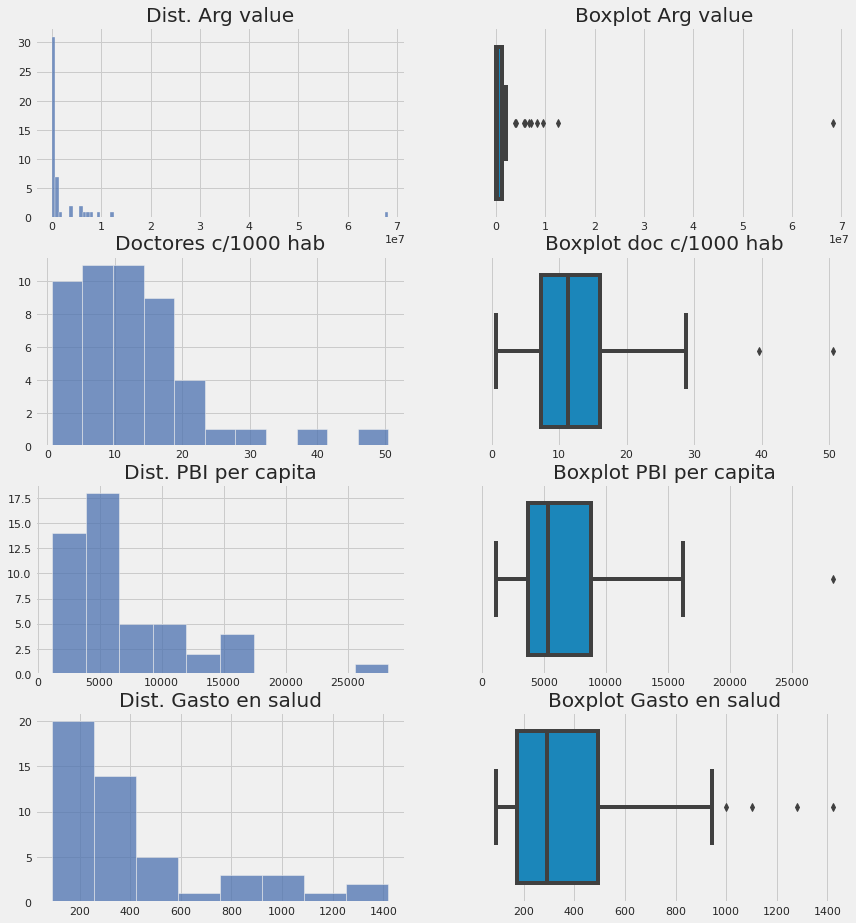

In [ ]:
df_cluster = df3[df3.cluster_alias=="3"]

fig, ax = plt.subplots(4, 2, figsize=(13,15))

# ARG_value
sns.histplot(data=df_cluster, x="ARG_value", ax=ax[0][0])
ax[0][0].set(xlabel='', ylabel='')
ax[0][0].set_title("Dist. Arg value")

sns.boxplot(data=df_cluster, x="ARG_value", ax=ax[0][1])
ax[0][1].set(xlabel='', ylabel='')
ax[0][1].set_title("Boxplot Arg value")

# S7
sns.histplot(data=df_cluster, x="S7", ax=ax[1][0])
ax[1][0].set(xlabel='', ylabel='')
ax[1][0].set_title("Doctores c/1000 hab")

sns.boxplot(data=df_cluster, x="S7", ax=ax[1][1])
ax[1][1].set_title("Boxplot doc c/1000 hab")
ax[1][1].set(xlabel='', ylabel='')


# E3
sns.histplot(data=df_cluster, x="E3", ax=ax[2][0])
ax[2][0].set(xlabel='', ylabel='')
ax[2][0].set_title("Dist. PBI per capita")

sns.boxplot(data=df_cluster, x="E3", ax=ax[2][1])
ax[2][1].set_title("Boxplot PBI per capita")
ax[2][1].set(xlabel='', ylabel='')

# G5
sns.histplot(data=df_cluster, x="G5", ax=ax[3][0])
ax[3][0].set(xlabel='', ylabel='')
ax[3][0].set_title("Dist. Gasto en salud")

sns.boxplot(data=df_cluster, x="G5", ax=ax[3][1])
ax[3][1].set_title("Boxplot Gasto en salud")
ax[3][1].set(xlabel='', ylabel='')

## Cluster 4F

In [ ]:
df3[df3.pais_x == "Armenia"].cluster_alias

7    4
Name: cluster_alias, dtype: object

In [ ]:
print(f'Los paises que componen el cluster 4 son: {df3[df3.cluster_alias == "4"].pais_x.values} ' )
print("=====================================================================================================")
df3[df3.cluster_alias == "4"][cols_pca].describe()

Los paises que componen el cluster 4 son: ['Aruba' 'Albania' 'Armenia' 'Antigua y Barbuda' 'Azerbaiyán' 'Bulgaria'
 'Bahamas' 'Bosnia y Herzegovina' 'Belarús' 'Barbados' 'Chipre'
 'República Checa' 'Estonia' 'Georgia' 'Grecia' 'Croacia' 'Hungría'
 'Jamaica' 'Kazajstán' 'Santa Lucía' 'Lituania' 'Letonia' 'Moldova'
 'México' 'Montenegro' 'Mauricio' 'Polonia' 'Portugal' 'Rumania' 'Rusia'
 'Serbia' 'Eslovaquia' 'Eslovenia' 'Trinidad y Tobago' 'Ucrania'] 


,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
mean,778.2,29.6,88.2,473.5,12700.9,360009145.1,651115.9,0.0,72.0,8.5,19.5
std,482.6,9.8,5.9,206.7,7466.2,685247732.5,1951881.2,0.0,14.7,6.4,11.5
min,125.0,1.1,72.2,121.2,2290.2,3338158.6,0.0,0.0,43.4,0.1,2.8
25%,380.6,23.7,85.8,335.9,5817.3,24055978.2,1636.0,0.0,61.9,4.1,7.6
50%,572.0,30.0,89.9,417.3,10819.2,122463517.4,30106.0,0.0,71.0,6.2,23.1
75%,1129.1,33.9,92.6,576.0,17194.5,325397513.9,159510.0,0.0,84.7,11.2,28.3
max,1771.6,51.0,95.2,937.8,30762.0,3234115051.0,10159893.0,0.1,95.5,26.1,42.1


El cluster Nº 4 presenta gran dispersión entre los países que lo componen, tanto en el nivel económico (E3) como en el gasto en salud (G5). Para mostrar los extremos no queda más que decir que lo componen Hong Kong y Aruba.



In [ ]:
print(f' El Cluster Nº 4 representa el {round(len(df3[df3.cluster_alias == "4"])/len(df3)*100,1)}% de los países anailzados') 
print(f' Y juntos acumulan el {round(df3.last_value[df3.cluster_alias == "4"].sum()/df3.last_value.sum()*100,1)}% de lo comerciado en el último año')

 El Cluster Nº 4 representa el 21.9% de los países anailzados
 Y juntos acumulan el 10.6% de lo comerciado en el último año


In [ ]:
print(f' El Cluster Nº 4 compra el {round(df3.ARG_value[df3.cluster_alias == "4"].sum()/df3.ARG_value.sum()*100,1)}% de las exportaciones argentinas')

 El Cluster Nº 4 compra el 11.2% de las exportaciones argentinas


In [ ]:
print(f' El Cluster Nº 4 en promedio se provee {round(df3.UE_part[df3.cluster == 4].mean())}% de Europa y {round(df3.CHN_part[df3.cluster == 4].mean())}% de China')
print(f' Esto indica que tiene el promedio de compra más bajo hacia países del resto del mundo con un {round(df3.Resto_part[df3.cluster == 4].mean()+df3.ARG_part[df3.cluster == 4].mean())}%')

 El Cluster Nº 4 en promedio se provee 66% de Europa y 6% de China
 Esto indica que tiene el promedio de compra más bajo hacia países del resto del mundo con un 28%


[Text(0, 0.5, ''), Text(0.5, 0, '')]

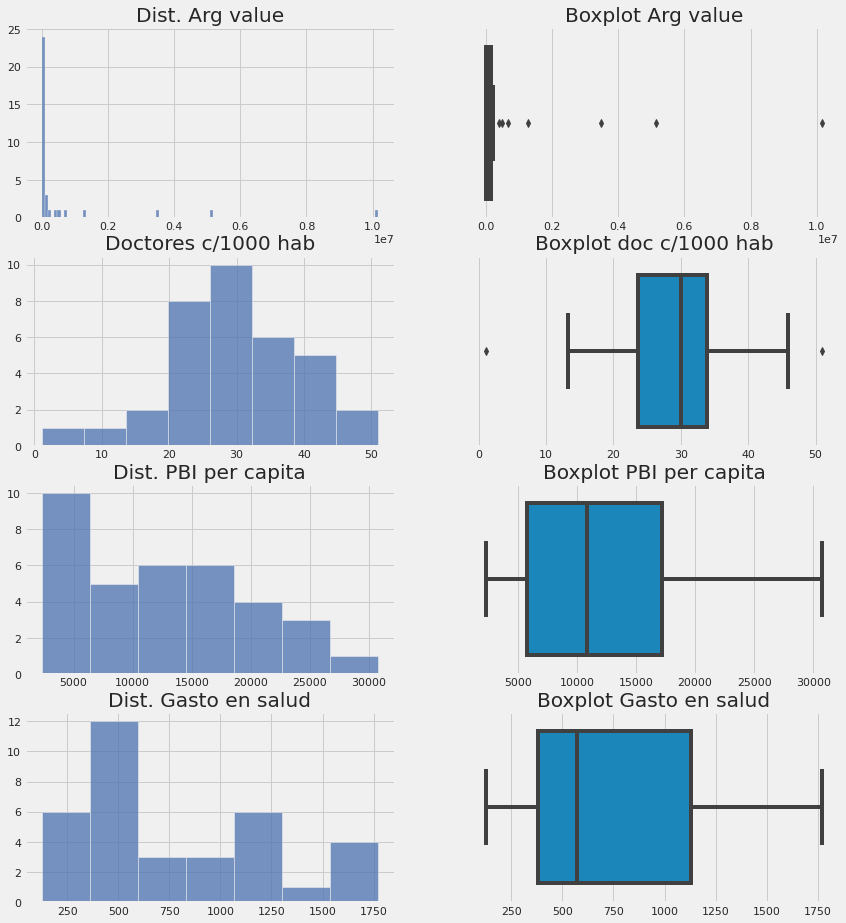

In [ ]:
df_cluster = df3[df3.cluster_alias == "4"]

fig, ax = plt.subplots(4, 2, figsize=(13,15))

# ARG_value
sns.histplot(data=df_cluster, x="ARG_value", ax=ax[0][0])
ax[0][0].set(xlabel='', ylabel='')
ax[0][0].set_title("Dist. Arg value")

sns.boxplot(data=df_cluster, x="ARG_value", ax=ax[0][1])
ax[0][1].set(xlabel='', ylabel='')
ax[0][1].set_title("Boxplot Arg value")

# S7
sns.histplot(data=df_cluster, x="S7", ax=ax[1][0])
ax[1][0].set(xlabel='', ylabel='')
ax[1][0].set_title("Doctores c/1000 hab")

sns.boxplot(data=df_cluster, x="S7", ax=ax[1][1])
ax[1][1].set_title("Boxplot doc c/1000 hab")
ax[1][1].set(xlabel='', ylabel='')


# E3
sns.histplot(data=df_cluster, x="E3", ax=ax[2][0])
ax[2][0].set(xlabel='', ylabel='')
ax[2][0].set_title("Dist. PBI per capita")

sns.boxplot(data=df_cluster, x="E3", ax=ax[2][1])
ax[2][1].set_title("Boxplot PBI per capita")
ax[2][1].set(xlabel='', ylabel='')

# G5
sns.histplot(data=df_cluster, x="G5", ax=ax[3][0])
ax[3][0].set(xlabel='', ylabel='')
ax[3][0].set_title("Dist. Gasto en salud")

sns.boxplot(data=df_cluster, x="G5", ax=ax[3][1])
ax[3][1].set_title("Boxplot Gasto en salud")
ax[3][1].set(xlabel='', ylabel='')

Habiendo analizado el Cluster N° 4, vemos que el mismo tiene el % más bajo de compras fuera de China, Europa y Estados Unidos. Presenta un bajo comercio con Argentina, convirtiendo a este segmento en poco viable para establecer como objetivo comercial.

______________________________________________________________________________
## **Cluster 5F**

In [ ]:
print(f'Los paises que componen el cluster 2 son: {df3[df3.cluster_alias == "5"]["pais_x"].values} ' )
print("=====================================================================================================")
df3[df3.cluster_alias == "5"][cols_pca].describe()

Los paises que componen el cluster 2 son: ['Andorra' 'Australia' 'Austria' 'Bélgica' 'Canadá' 'Suiza' 'España'
 'Finlandia' 'Reino Unido de Gran Bretaña e Irlanda del Norte' 'Dinamarca'
 'Hong Kong (región administrativa especial de China)' 'Irlanda'
 'Islandia' 'Israel' 'Italia' 'Corea' 'Luxemburgo'
 'Macao (región administrativa especial de China)' 'Malta' 'Noruega'
 'Nueva Zelandia' 'Singapur' 'Suecia'] 


,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0
mean,4349.6,34.8,86.3,907.4,52624.8,1769487063.1,573935.0,0.0,73.1,6.9,20.0
std,1784.9,7.6,6.7,433.8,19669.9,1834318096.9,712620.6,0.0,15.1,8.2,11.1
min,2280.3,23.1,72.3,422.6,26748.2,2260475.6,0.0,0.0,41.5,0.4,2.7
25%,2955.5,29.2,85.8,689.9,40248.6,299693259.7,35098.5,0.0,67.2,2.7,10.7
50%,4315.7,33.3,89.5,794.9,46193.6,1001956042.0,177466.0,0.0,76.6,5.1,18.6
75%,4845.6,40.2,90.2,904.5,63299.9,2405154140.5,907190.0,0.0,84.1,7.2,24.1
max,9818.0,51.4,93.2,2165.0,104498.7,5621153690.0,2254586.0,0.0,96.9,40.3,45.6


El cluster Nº 5 está compuesto por 23 países, en  su mayoría países de Europa.  Son países con un PBI per cápita por encima de la media mundial, así como sus gastos en salud per cápita y sus gasto de bolsillo en salud. Por último, poseen un promedio de doctores cada 1.000 habitantes qué es el doble que la media mundial.

Son en su mayoría grandes importadores de insumos médicos. Sin embargo, los países del cluster Nº 5 no comercian de manera significativa con Argentina. Su principal proveedor es la Unión Europea y Estados Unidos con una participación media de 73,1% (y una mínima de 41,5%). 

El hecho de que su principal origen de importaciones sea la Unión Europea y Estados Unidos puede sugerir que sus aduanas aplican estrictos requerimentos de licencias y estándares de calidad que podrían dejar fuera del mercado a una gran cantidad de productos argentinos. Es decir, estos países no estarían entre los candidatos que estamos buscando.

In [ ]:
print(f' El Cluster Nº 5 representa el {round(len(df3[df3.cluster_alias == "5"])/len(df3)*100,1)}% de los países analizados,') 
print(f' Y juntos acumulan el {round(df3.last_value[df3.cluster_alias == "5"].sum()/df3.last_value.sum()*100,1)}% de lo comerciado en el último año')

 El Cluster Nº 5 representa el 14.4% de los países analizados,
 Y juntos acumulan el 32.4% de lo comerciado en el último año


In [ ]:
print(f' El Cluster Nº 5 compra el {round(df3.ARG_value[df3.cluster_alias == "5"].sum()/df3.ARG_value.sum()*100,1)}% de las exportaciones argentinas') 

 El Cluster Nº 5 compra el 6.5% de las exportaciones argentinas


[Text(0, 0.5, ''), Text(0.5, 0, '')]

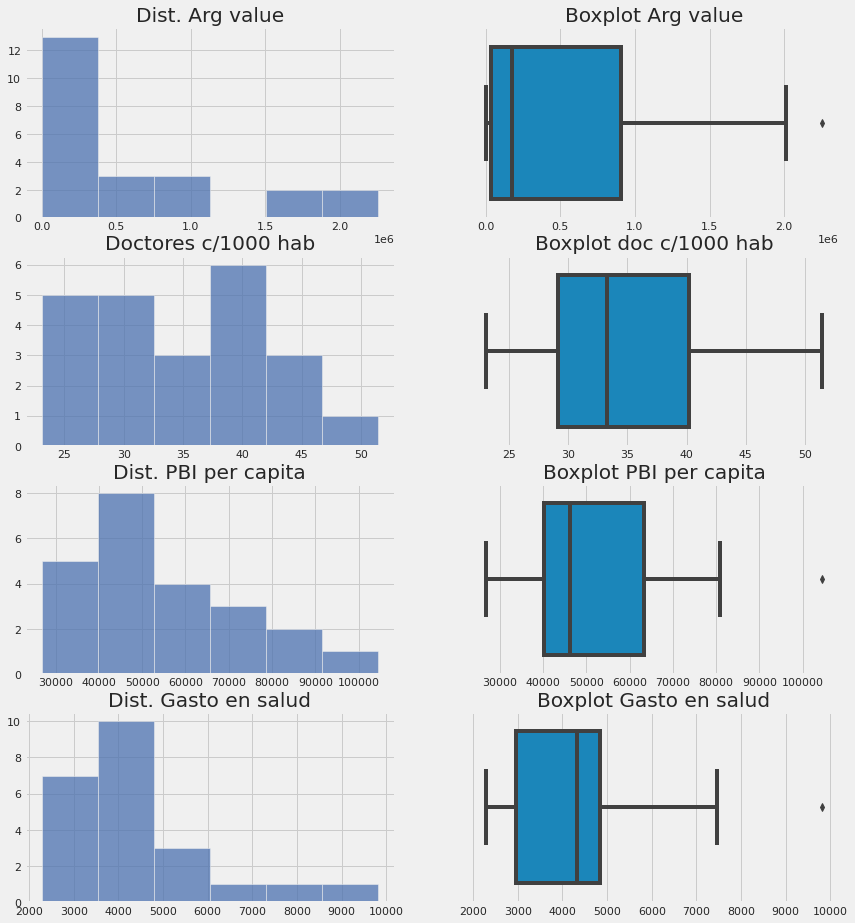

In [ ]:
# G5, S7, E3 

df_cluster = df3[df3.cluster_alias=="5"]

fig, ax = plt.subplots(4, 2, figsize=(13,15))

# fig.title("Cluster 0")
# ARG_value
sns.histplot(data=df_cluster, x="ARG_value", ax=ax[0][0])
ax[0][0].set(xlabel='', ylabel='')
ax[0][0].set_title("Dist. Arg value")

sns.boxplot(data=df_cluster, x="ARG_value", ax=ax[0][1])
ax[0][1].set(xlabel='', ylabel='')
ax[0][1].set_title("Boxplot Arg value")

# S7
sns.histplot(data=df_cluster, x="S7", ax=ax[1][0])
ax[1][0].set(xlabel='', ylabel='')
ax[1][0].set_title("Doctores c/1000 hab")

sns.boxplot(data=df_cluster, x="S7", ax=ax[1][1])
ax[1][1].set_title("Boxplot doc c/1000 hab")
ax[1][1].set(xlabel='', ylabel='')


# E3
sns.histplot(data=df_cluster, x="E3", ax=ax[2][0])
ax[2][0].set(xlabel='', ylabel='')
ax[2][0].set_title("Dist. PBI per capita")

sns.boxplot(data=df_cluster, x="E3", ax=ax[2][1])
ax[2][1].set_title("Boxplot PBI per capita")
ax[2][1].set(xlabel='', ylabel='')

# G5
sns.histplot(data=df_cluster, x="G5", ax=ax[3][0])
ax[3][0].set(xlabel='', ylabel='')
ax[3][0].set_title("Dist. Gasto en salud")

sns.boxplot(data=df_cluster, x="G5", ax=ax[3][1])
ax[3][1].set_title("Boxplot Gasto en salud")
ax[3][1].set(xlabel='', ylabel='')


## Cluster 6F

In [ ]:
print(f'Los paises que componen el cluster 6 son: {df3[df3.cluster_alias == "6"].pais_x.values} ' )
print("=====================================================================================================")
df3[df3.cluster_alias == "6"][cols_pca].describe()

Los paises que componen el cluster 6 son: ['China' 'Alemania' 'Francia' 'Japón' 'Países Bajos'] 


,G5,S7,S3,S12,E3,media_value,ARG_value,ARG_part,UE_part,CHN_part,Resto_part
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,3504.4,30.3,88.0,490.9,35777.9,10068884187.8,2998106.2,0.0,66.5,5.1,28.4
std,1769.7,9.5,3.4,198.9,15661.4,2153758894.3,4152896.0,0.0,8.9,4.0,7.9
min,425.6,17.9,82.4,246.9,8827.0,7303864116.0,43913.0,0.0,59.8,0.9,15.6
25%,3732.6,24.1,87.6,308.7,38430.3,9198571832.0,90526.0,0.0,61.5,3.2,26.7
50%,4026.1,32.3,89.3,577.0,38484.2,9769542707.0,1528402.0,0.0,61.7,4.8,30.8
75%,4591.8,35.1,89.6,651.0,44665.5,10958841172.0,3289709.0,0.0,68.4,4.9,33.6
max,4746.0,42.1,91.2,671.1,48482.8,13113601112.0,10037981.0,0.0,81.2,11.6,35.3


In [ ]:
print(f' El Cluster Nº 6 representa el {round(len(df3[df3.cluster_alias == "6"])/len(df3)*100,1)}% de los países anailzados') 
print(f' Y juntos acumulan el {round(df3.last_value[df3.cluster_alias == "6"].sum()/df3.last_value.sum()*100,1)}% de lo comerciado en el último año')

 El Cluster Nº 6 representa el 3.1% de los países anailzados
 Y juntos acumulan el 40.7% de lo comerciado en el último año


In [ ]:
print(f' El Cluster Nº 3 compra el {round(df3.ARG_value[df3.cluster_alias == "6"].sum()/df3.ARG_value.sum()*100,1)}% de las exportaciones argentinas') 

 El Cluster Nº 3 compra el 7.4% de las exportaciones argentinas


El cluster Nº 3 incluye solo 9 países, todos con ingresos per cápida altos (salvo China). 

Son los grandes importadores de insumos médicos, acumulando entre los 9 el 40,7% del total comerciado en 2018.

Su principal proveedor es Estados Unidos y la Unión Europea (media del 70% y min del 60%).

Este cluster no es un destino para las exportaciones argentinas.

[Text(0, 0.5, ''), Text(0.5, 0, '')]

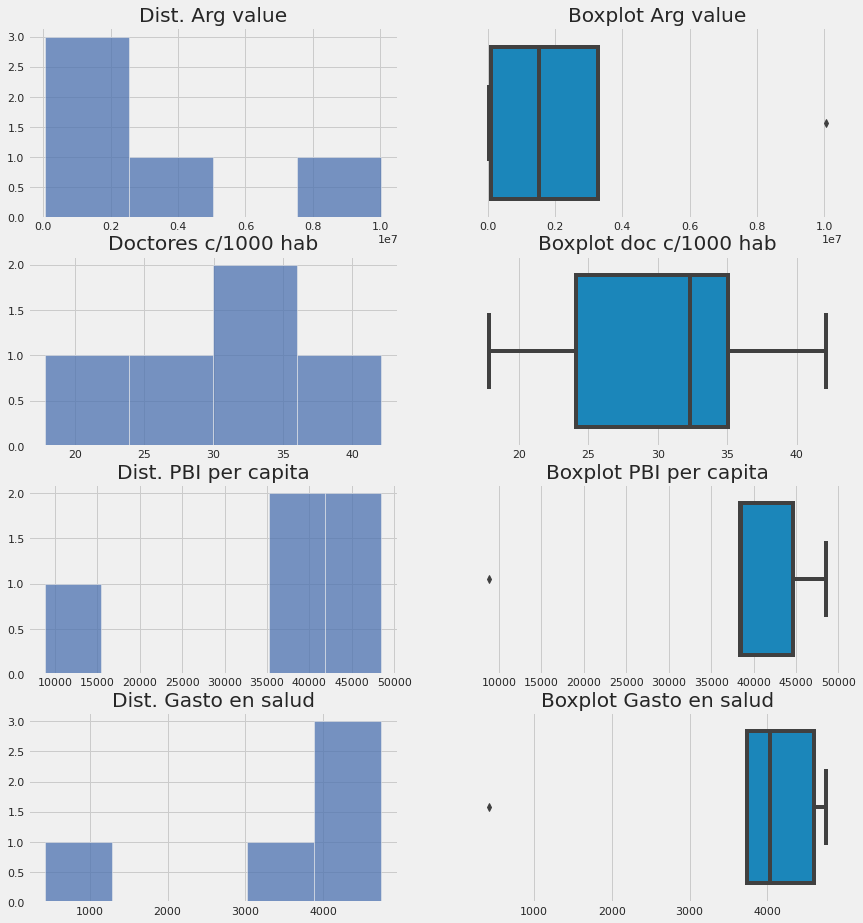

In [ ]:
df_cluster = df3[df3.cluster_alias == "6"]

fig, ax = plt.subplots(4, 2, figsize=(13,15))

# ARG_value
sns.histplot(data=df_cluster, x="ARG_value", ax=ax[0][0])
ax[0][0].set(xlabel='', ylabel='')
ax[0][0].set_title("Dist. Arg value")

sns.boxplot(data=df_cluster, x="ARG_value", ax=ax[0][1])
ax[0][1].set(xlabel='', ylabel='')
ax[0][1].set_title("Boxplot Arg value")

# S7
sns.histplot(data=df_cluster, x="S7", ax=ax[1][0])
ax[1][0].set(xlabel='', ylabel='')
ax[1][0].set_title("Doctores c/1000 hab")

sns.boxplot(data=df_cluster, x="S7", ax=ax[1][1])
ax[1][1].set_title("Boxplot doc c/1000 hab")
ax[1][1].set(xlabel='', ylabel='')


# E3
sns.histplot(data=df_cluster, x="E3", ax=ax[2][0])
ax[2][0].set(xlabel='', ylabel='')
ax[2][0].set_title("Dist. PBI per capita")

sns.boxplot(data=df_cluster, x="E3", ax=ax[2][1])
ax[2][1].set_title("Boxplot PBI per capita")
ax[2][1].set(xlabel='', ylabel='')

# G5
sns.histplot(data=df_cluster, x="G5", ax=ax[3][0])
ax[3][0].set(xlabel='', ylabel='')
ax[3][0].set_title("Dist. Gasto en salud")

sns.boxplot(data=df_cluster, x="G5", ax=ax[3][1])
ax[3][1].set_title("Boxplot Gasto en salud")
ax[3][1].set(xlabel='', ylabel='')

## Posibles candidatos

Para los posibles candidatos, si bien se requiere un analisis mas cualitiativo del problema, se van analizar posibles candidatos con los siguientes criterios:

Para todos se verán aquellos paises con los que actualmente Argentina no comercia. 

1. Evaluando dentro del mismo cluster ordenando por el indice compuesto armado, tanto  solo considerando paises de America, y del resto del mundo.



In [ ]:
df3.continente.unique()

array(['América', 'Asia', 'África', 'Europa', 'Oceanía'], dtype=object)

### 1 En el mismo cluster

In [ ]:
df_selected_index[(df_selected_index.cluster_alias == "3") & (df_selected_index.ARG_value == 0) & (df_selected_index.continente == "América")]\
[["composite_ix", "ranking", "iso_pais","pais_x", "continente"]].sort_values(by='ranking')[:10].reset_index(drop=True)

,composite_ix,ranking,iso_pais,pais_x,continente
0,0.2,76.0,SUR,Suriname,América
1,0.2,87.0,BLZ,Belice,América
2,0.1,101.0,VCT,San Vicente y Las Granadinas,América
3,0.1,108.0,GUY,Guyana,América


In [ ]:
df_selected_index.head()

,0,3,composite_ix,ranking,iso_pais,pais_x,cluster,cluster_alias,ARG_value,UE_value,continente
0,0.2,0.0,0.2,50.0,ABW,Aruba,1.0,4,0.0,32694844.0,América
1,0.0,0.0,0.0,160.0,AFG,Afganistán,0.0,1,0.0,74576272.0,Asia
2,0.0,0.1,0.1,136.0,AGO,Angola,0.0,1,93356.0,155144540.0,África
3,0.1,0.0,0.2,72.0,ALB,Albania,1.0,4,0.0,59196413.0,Europa
4,0.2,0.1,0.3,12.0,AND,Andorra,2.0,5,0.0,41541216.0,Europa


In [ ]:
# Ranking en el mismo cluster de Argentina, que comercian y no con argentina
df_selected_index[(df_selected_index.cluster_alias == "3") & (df_selected_index.ARG_value != 0)]\
[["composite_ix", "ranking", "iso_pais","pais_x", "continente", "ARG_value"]].sort_values(by='ranking')[:40].reset_index(drop=True)

,composite_ix,ranking,iso_pais,pais_x,continente,ARG_value
0,0.2,33.0,BRA,Brasil,América,68249339.0
1,0.2,40.0,CRI,Costa Rica,América,2042111.0
2,0.2,43.0,CHL,Chile,América,8276889.0
3,0.2,44.0,URY,Uruguay,América,5815746.0
4,0.2,55.0,ARG,Argentina,América,52861.0
5,0.2,57.0,COL,Colombia,América,12463047.0
6,0.2,60.0,TUR,Turquía,Europa,3943958.0
7,0.2,64.0,PAN,Panamá,América,81488.0
8,0.2,65.0,SLV,El Salvador,América,389969.0
9,0.2,67.0,THA,Tailandia,Asia,3747947.0


In [ ]:
# Paises que NO comercian con Argentina
df_selected_index[(df_selected_index.cluster_alias == "3") & (df_selected_index.ARG_value == 0)]\
[["composite_ix", "ranking", "iso_pais","pais_x", "continente", "ARG_value"]].sort_values(by='ranking')[:20].reset_index(drop=True)

,composite_ix,ranking,iso_pais,pais_x,continente,ARG_value
0,0.2,59.0,PLW,Palau,Oceanía,0.0
1,0.2,76.0,SUR,Suriname,América,0.0
2,0.2,79.0,MDV,Maldivas,Asia,0.0
3,0.2,87.0,BLZ,Belice,América,0.0
4,0.2,93.0,SYC,Seychelles,África,0.0
5,0.1,98.0,STP,Santo Tomé y Príncipe,África,0.0
6,0.1,100.0,CPV,Cabo Verde,África,0.0
7,0.1,101.0,VCT,San Vicente y Las Granadinas,América,0.0
8,0.1,107.0,TON,Tonga,Oceanía,0.0
9,0.1,108.0,GUY,Guyana,América,0.0


### 2 Un cluster mas rico

In [ ]:
# Ordenados por peor performance en el ranking:
df_selected_index[(df_selected_index.cluster_alias == "4") & (df_selected_index.ARG_value == 0)]\
[["composite_ix", "ranking", "iso_pais","pais_x", "continente"]].sort_values(by='ranking', ascending=False)[:10].reset_index(drop=True)

,composite_ix,ranking,iso_pais,pais_x,continente
0,0.2,77.0,LCA,Santa Lucía,América
1,0.2,72.0,ALB,Albania,Europa
2,0.2,63.0,ATG,Antigua y Barbuda,América
3,0.2,62.0,MNE,Montenegro,Europa
4,0.2,52.0,BRB,Barbados,América
5,0.2,50.0,ABW,Aruba,América
6,0.2,46.0,BHS,Bahamas,América


### 3 Un cluster mas pobre

In [ ]:
df_selected_index[(df_selected_index.cluster_alias == "2") & (df_selected_index.ARG_value == 0)]\
[["composite_ix", "ranking", "iso_pais","pais_x", "continente"]].sort_values(by='ranking', ascending=True)[:10].reset_index(drop=True)

,composite_ix,ranking,iso_pais,pais_x,continente
0,0.1,103.0,OMN,Omán,Asia


In [ ]:
# se revisan tambien los que esten debajo de la media:
df_selected_index[(df_selected_index.cluster_alias == "2") & (df_selected_index.ARG_value < df_selected_index.ARG_value.mean() )]\
[["composite_ix", "ranking", "iso_pais","pais_x", "continente"]].sort_values(by='ranking', ascending=True)[:10].reset_index(drop=True)

,composite_ix,ranking,iso_pais,pais_x,continente
0,0.2,58.0,SAU,Arabia Saudita,Asia
1,0.2,66.0,KWT,Kuwait,Asia
2,0.2,73.0,ARE,Emiratos Árabes Unidos,Asia
3,0.2,89.0,BHR,Bahrein,Asia
4,0.1,96.0,QAT,Qatar,Asia
5,0.1,103.0,OMN,Omán,Asia
